![olympics](https://images.unsplash.com/photo-1588543385566-413e13a51a24?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=750&q=80)

# **Table of Contents**

* [1.About Dataset](#1)
 * [1.1 How to use this dataset](#1.1)
* [2. Exploratory Data Analysis (EDA)](#2)
 * [HeatMap of the Dataset](#2.1)
* [3. Model Training](#3)
 * [3.1 Pycaret Model comparision](#3.1)
 * [3.2 Optuna LGBM Hyperparameter tuning](#3.2)
 * [3.3 Optuna CATBOOST Hyperparameter tuning](#3.3)
 * [3.4 Optuna XGBOOST Hyperparameter tuning](#3.4)
* [4. Model Best Score](#4)
* [5. Work in Progress](#5)
<a id='0'></a>

# **1. About Dataset**
<a id='1' ></a>
* [Jump top](#0)

<h5 style="color:red;">Cardiovascular diseases (CVDs) are the number 1 cause of death globally</h5>taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

In [1]:
#importing important libraries
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import optuna
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, KFold
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.dpi'] = 600

%matplotlib inline

# **1.1 How to use this dataset**

<a id='1.1' ></a>
* [Jump top](#0)

> **Create a model for predicting mortality caused by Heart Failure.**

In [2]:
#importing file to get started
heart = pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')

#checking the dataset
heart.head()
heart.shape #(299, 13)
heart.describe().T
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


* Sex - Gender of patient Male = 1, Female =0
* Age - Age of patient
* Diabetes - 0 = No, 1 = Yes
* Anaemia - 0 = No, 1 = Yes
* High_blood_pressure - 0 = No, 1 = Yes
* Smoking - 0 = No, 1 = Yes
* DEATH_EVENT - 0 = No, 1 = Yes

# **2. Exploratory Data Analysis (EDA)**

<a id='2' ></a>
* [Jump top](#0)

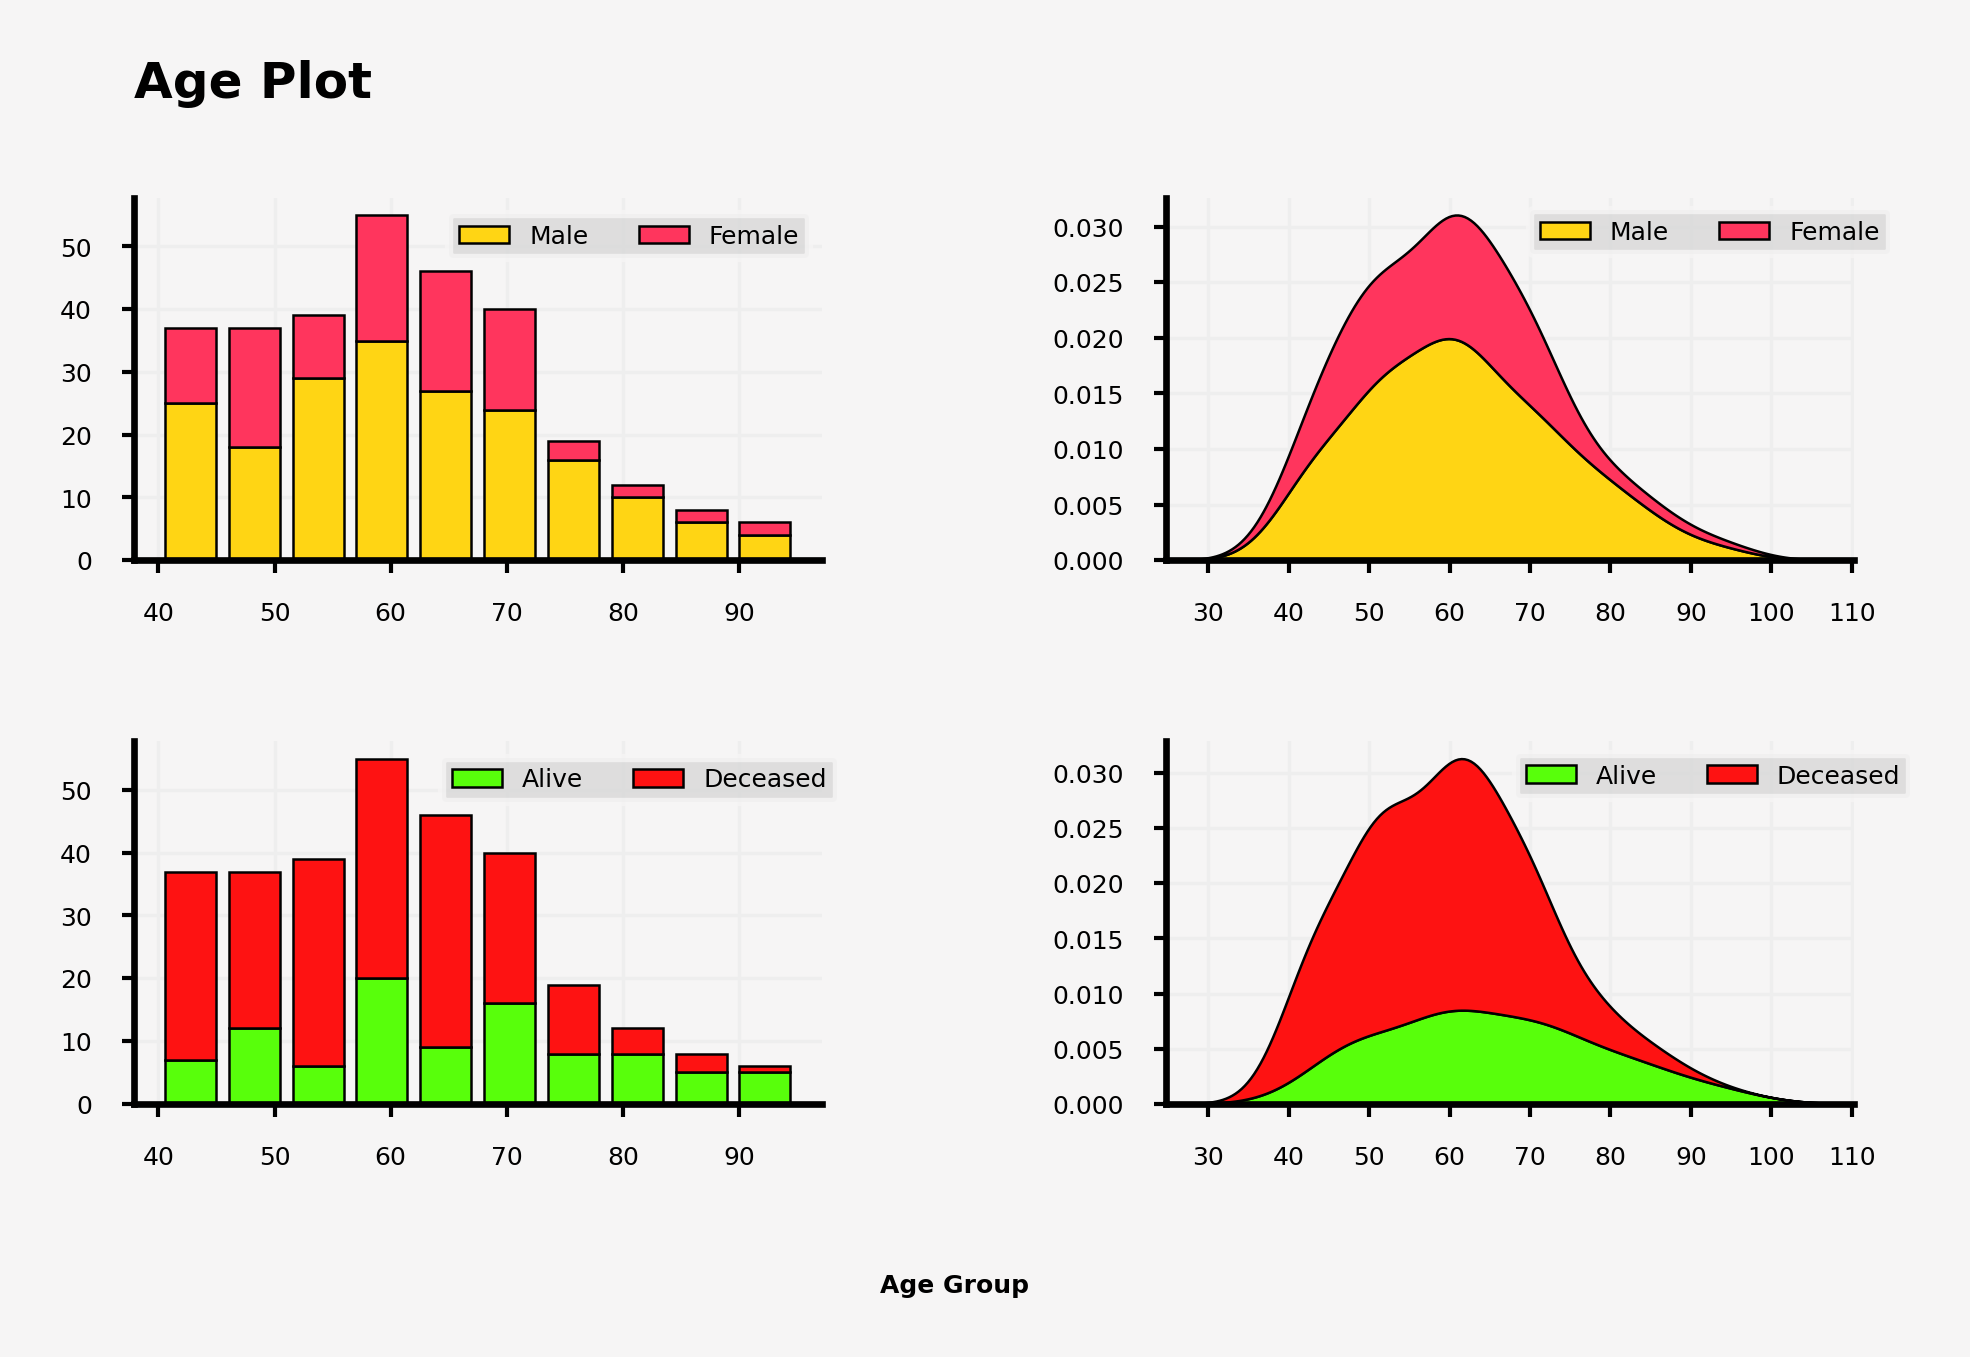

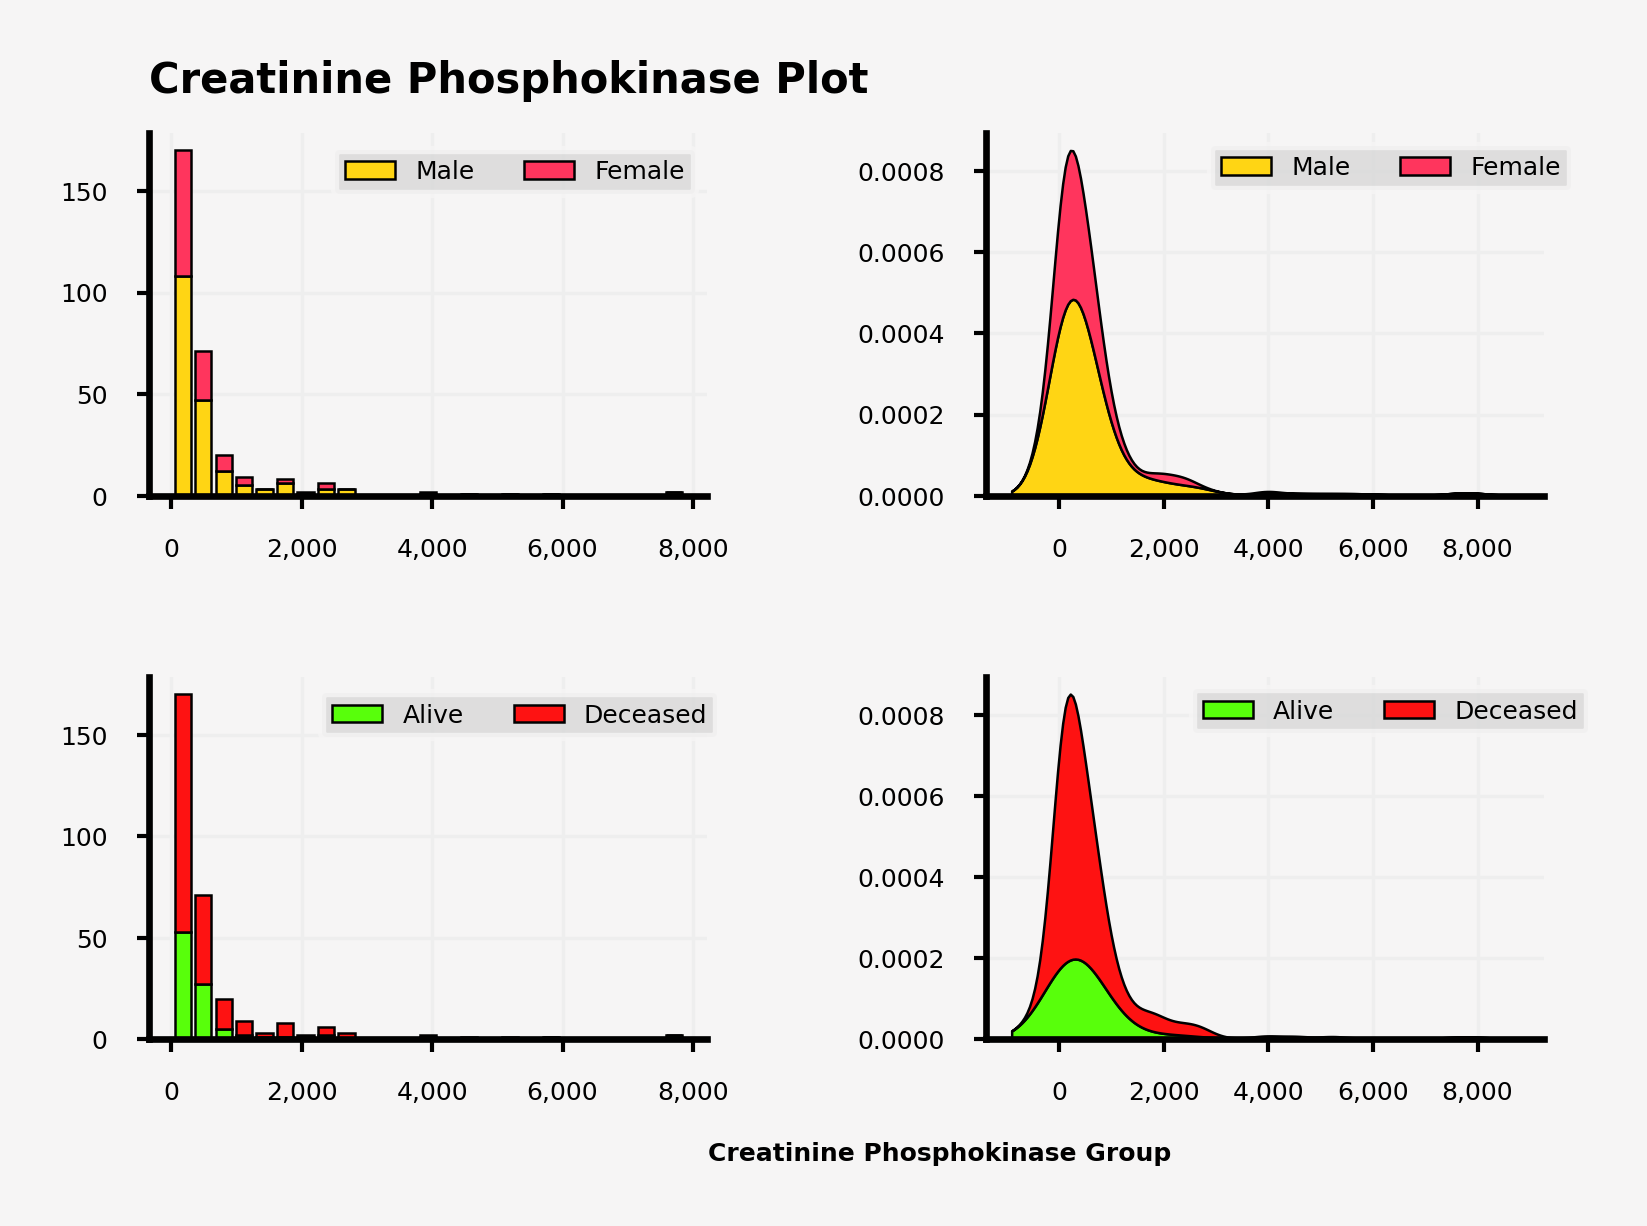

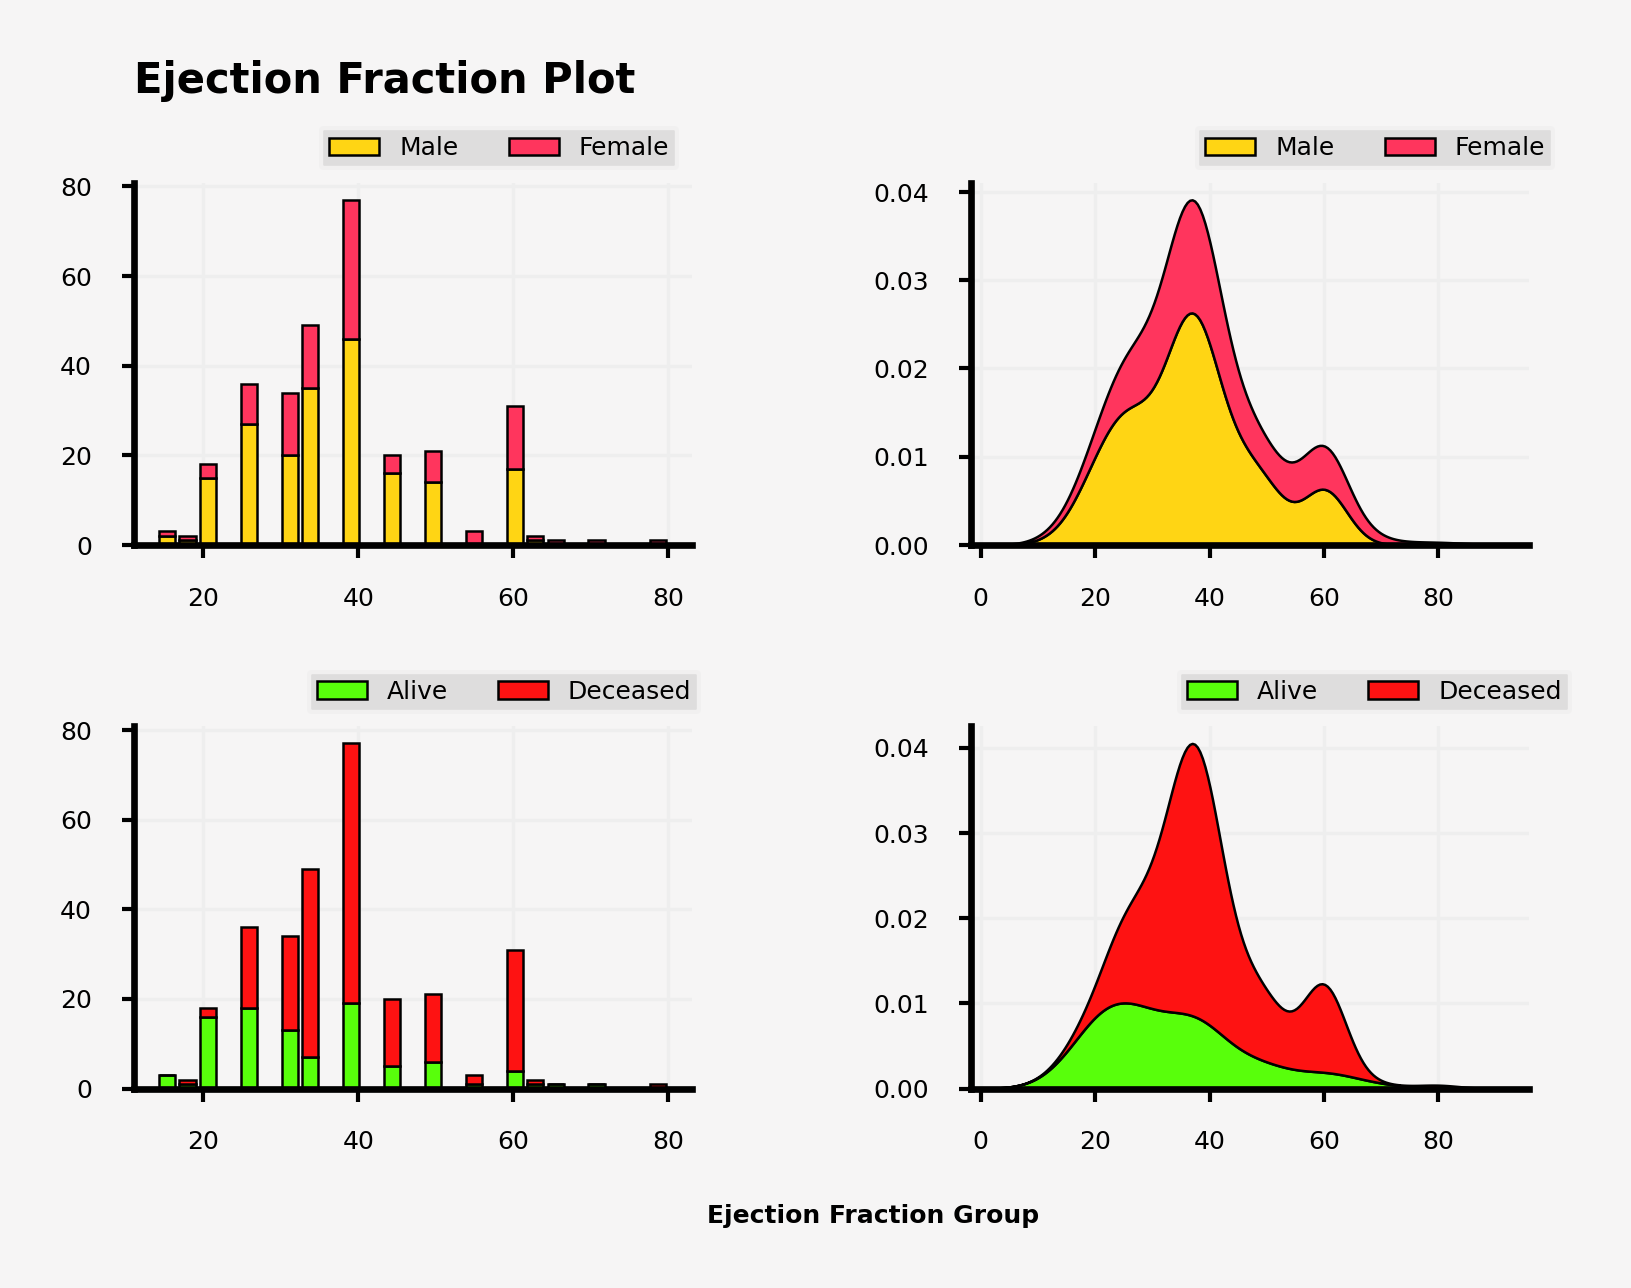

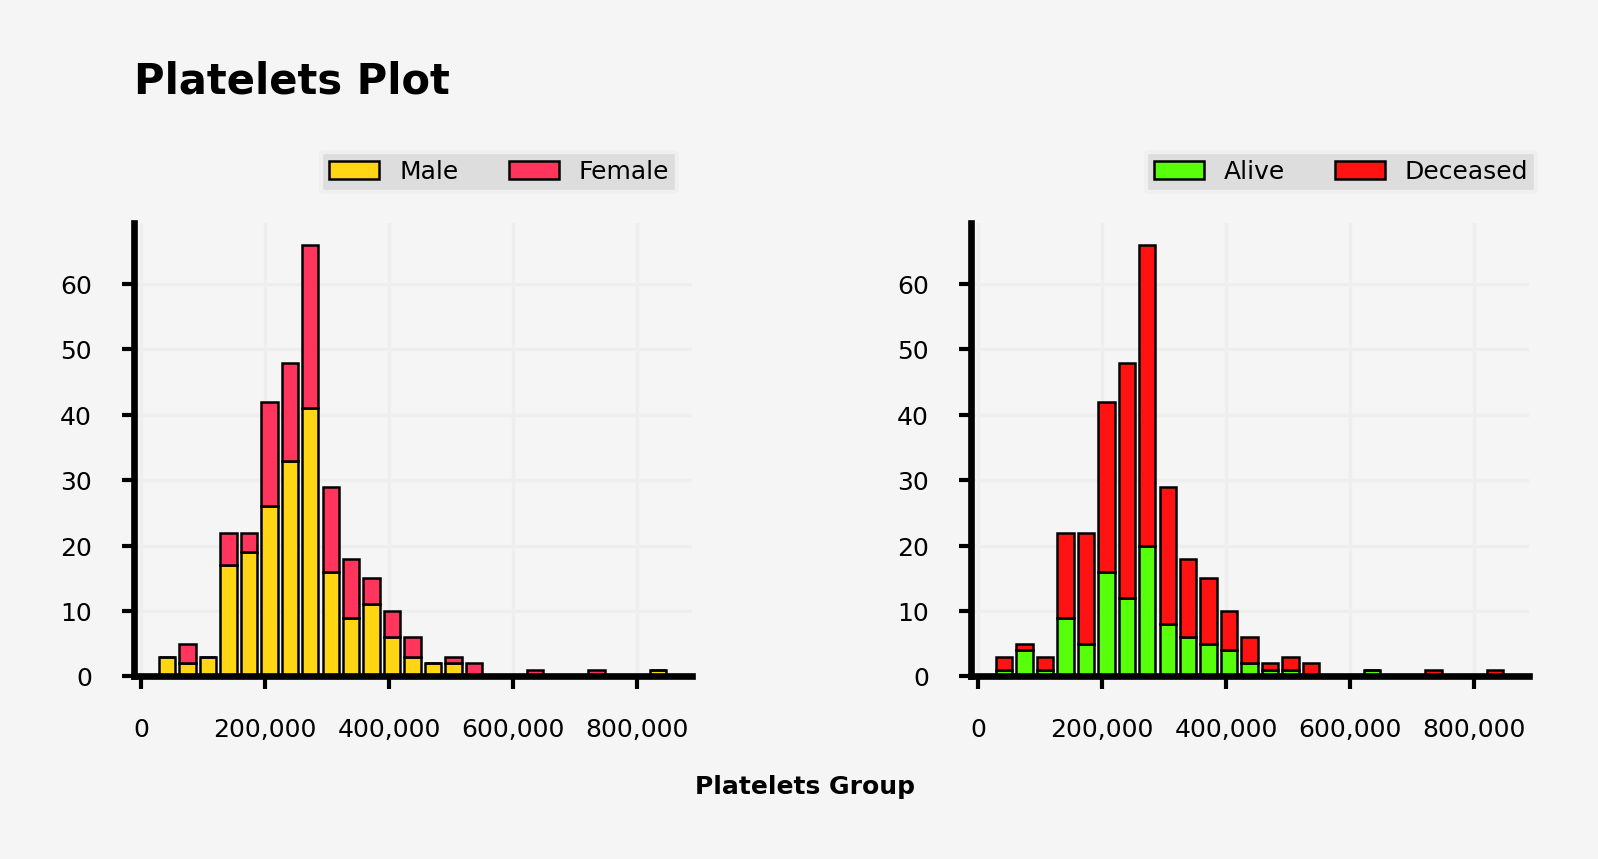

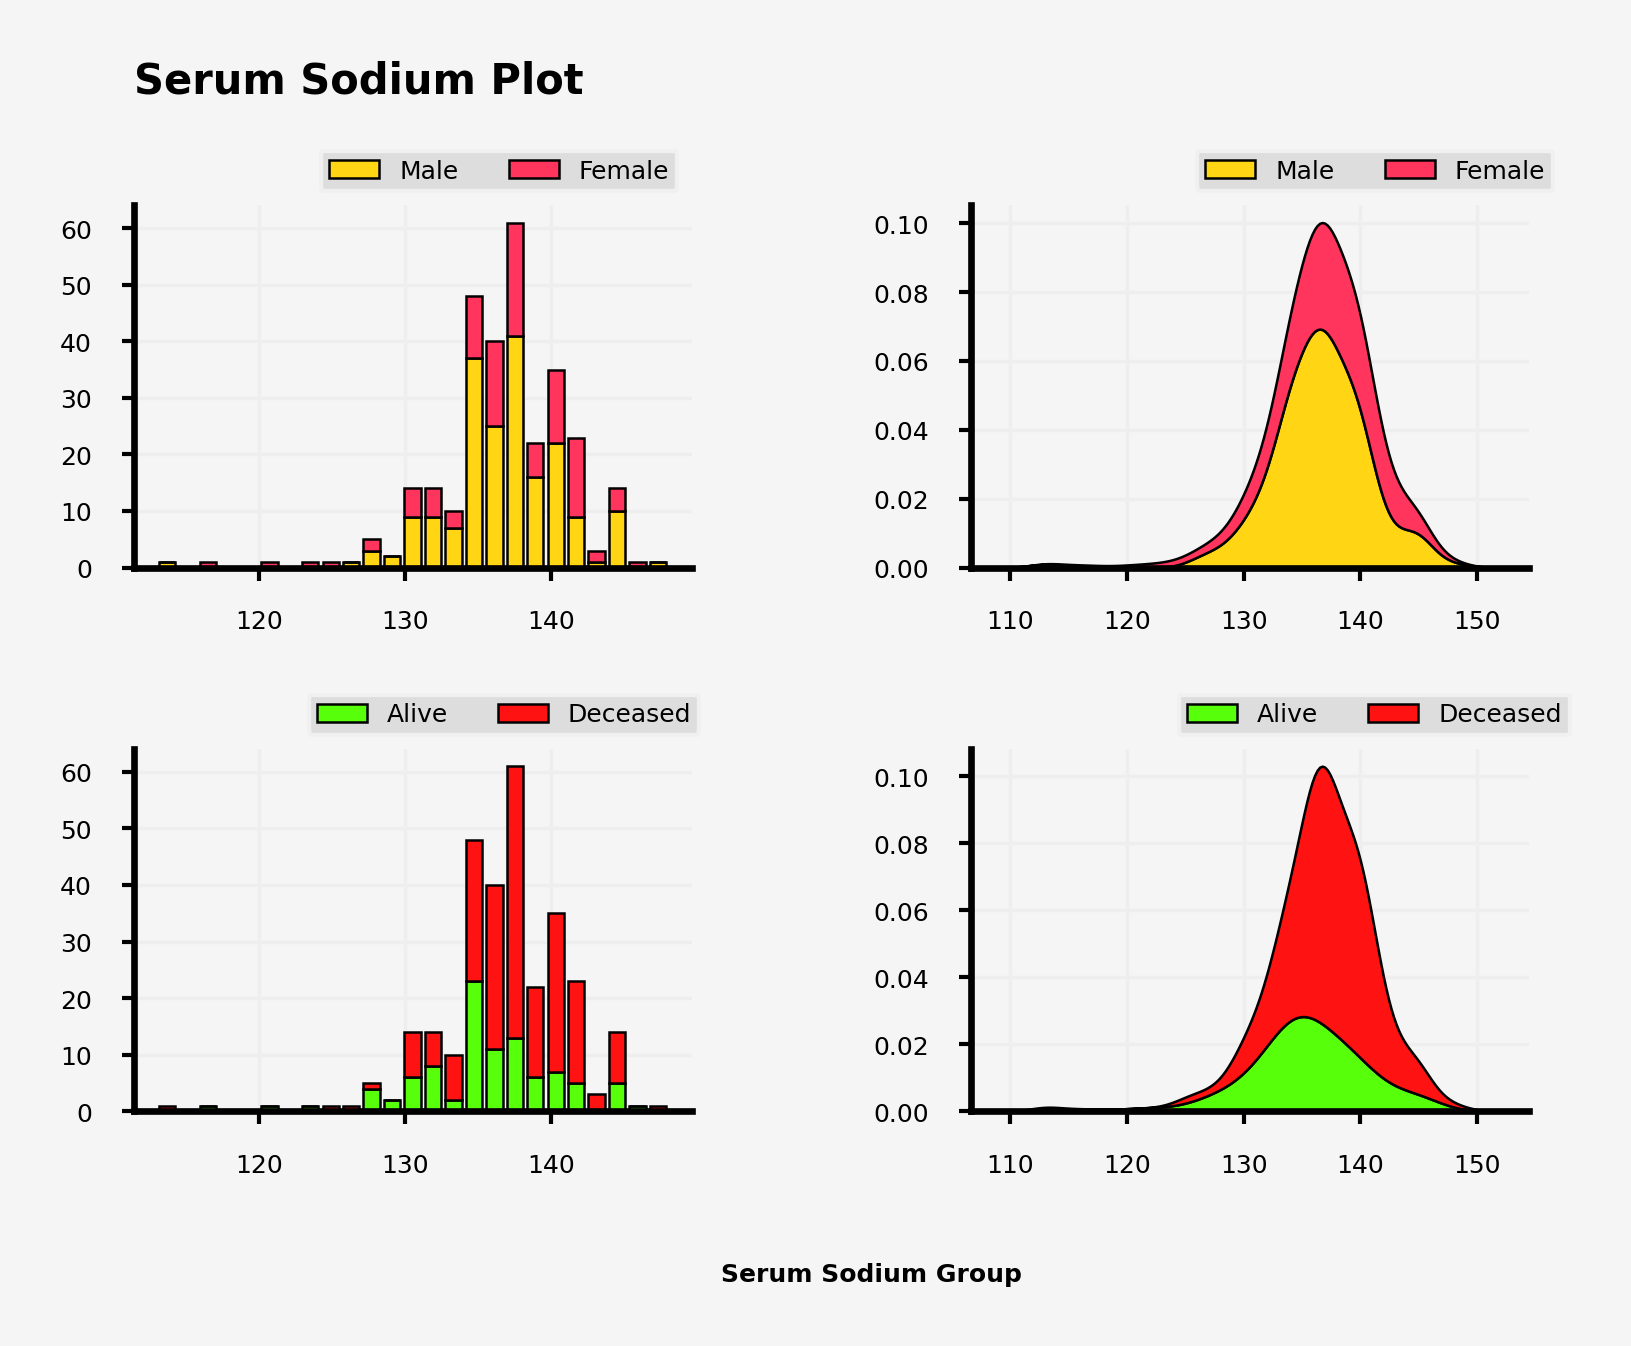

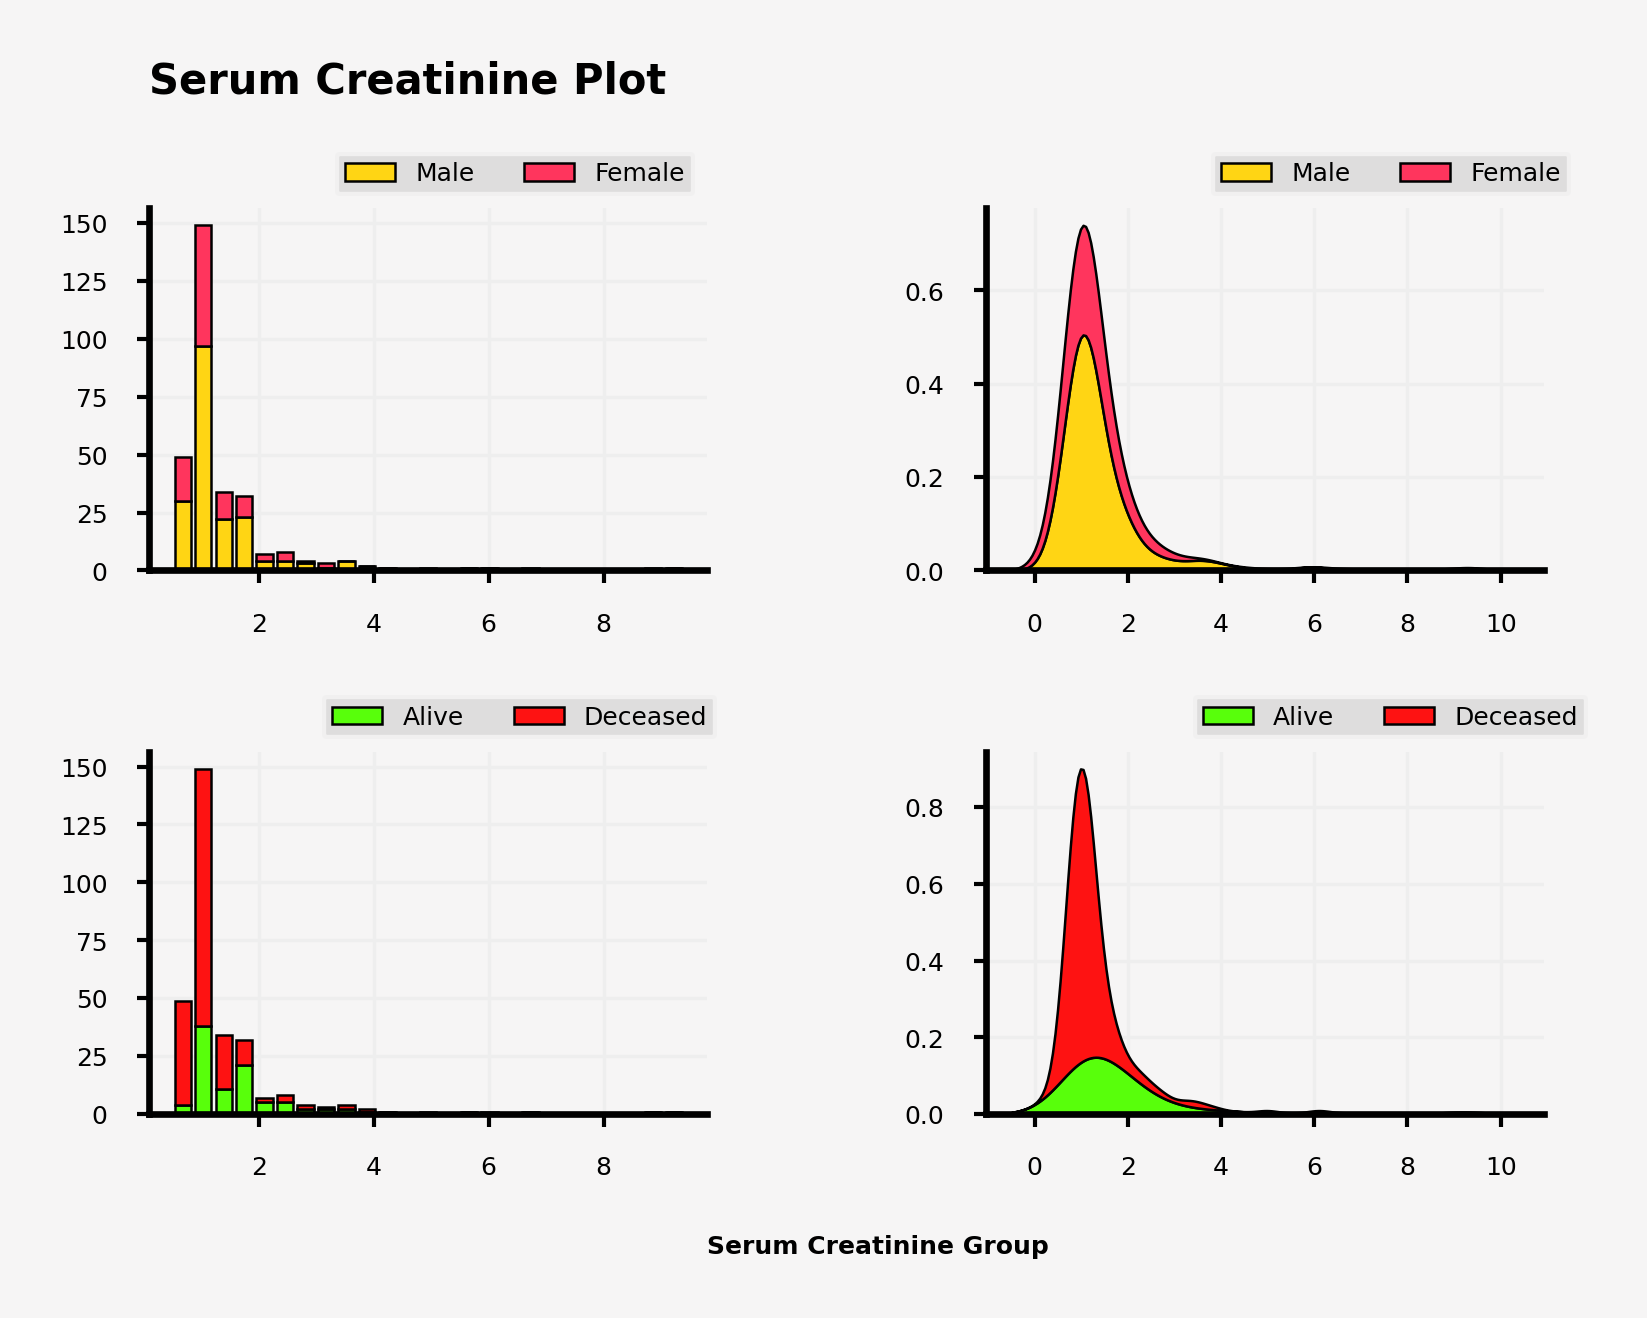

In [3]:
conti = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_sodium','serum_creatinine']
conti_name = ['Age','Creatinine Phosphokinase','Ejection Fraction','Platelets','Serum Sodium','Serum Creatinine']

value = conti[0]
X1 = conti_name[0]

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(3.7,2), facecolor='#f6f5f5')
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.5, hspace=0.5)

background_color = "#f6f5f5"
sns.set_palette(['#ff355d','#ffd514'])


#1
ax0 = fig.add_subplot(gs[0, 0])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.set_facecolor(background_color)


ax0_sns = sns.histplot(data=heart, x=value,ax=ax0,zorder=2,kde=False,hue="sex",multiple="stack", shrink=.8
                      ,linewidth=0.3,alpha=1)

ax0_sns.set_xlabel('',fontsize=4, weight='bold')
ax0_sns.set_ylabel('',fontsize=4, weight='bold')

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)

ax0_sns.legend(['Male','Female'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1, 0.989), loc='upper right')


#2
ax1 = fig.add_subplot(gs[0, 1])


for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)

ax1.set_facecolor(background_color)


ax1_sns = sns.kdeplot( x=heart[value],ax=ax1,hue=heart.sex,linewidth=0.3,fill=True,cbar='g',zorder=2,alpha=1,multiple='stack')

ax1_sns.set_xlabel('',fontsize=4, weight='bold')
ax1_sns.set_ylabel('',fontsize=4, weight='bold')

ax1_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax1_sns.tick_params(labelsize=3, width=0.5, length=1.5)

ax1_sns.legend(['Male','Female'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1.07, 1), loc='upper right')

#3
ax3 = fig.add_subplot(gs[1, 0])


for s in ["right", "top"]:
    ax3.spines[s].set_visible(False)

ax3.set_facecolor(background_color)


ax3_sns = sns.histplot(data=heart, x=value,ax=ax3,zorder=2,kde=False,hue="DEATH_EVENT",multiple="stack", shrink=.8
                      ,linewidth=0.3,alpha=1,palette=['#FE1212','#58FF0B'])

ax3_sns.set_xlabel('',fontsize=4, weight='bold')
ax3_sns.set_ylabel('',fontsize=4, weight='bold')

ax3_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax3_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax3_sns.tick_params(labelsize=3, width=0.5, length=1.5)

ax3_sns.legend(['Alive','Deceased'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1.04, 0.989), loc='upper right')

#4
ax4 = fig.add_subplot(gs[1, 1])


for s in ["right", "top"]:
    ax4.spines[s].set_visible(False)

ax4.set_facecolor(background_color)


ax4_sns = sns.kdeplot( x=heart[value],ax=ax4,hue=heart.DEATH_EVENT,linewidth=0.3,fill=True,cbar='g',zorder=2,alpha=1,multiple='stack',palette=['#FE1212','#58FF0B'])

ax4_sns.set_xlabel('',fontsize=4, weight='bold')
ax4_sns.set_ylabel('',fontsize=4, weight='bold')

ax4_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax4_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax4_sns.tick_params(labelsize=3, width=0.5, length=1.5)

ax4_sns.legend(['Alive','Deceased'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1.1, 1), loc='upper right')

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0_sns.text(Xstart,Yend+16, f'{X1} Plot', fontsize=6, weight='bold',ha='left')
#   ax0.text(Xstart,Yend+10,f'Mean: 60.83 | SD: 11.89',fontsize=3,ha='left')
ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax3.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax4.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

Xstart, Xend = ax3.get_xlim()
Ystart, Yend = ax3.get_ylim()

ax3_sns.text(Xend+5,Ystart-30, f'{X1} Group', fontsize=3, weight='bold',ha='left')

plt.show()

#########################################################################################################
value = conti[1]
X1 = conti_name[1]
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(3,2), facecolor='#f6f5f5')
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.5, hspace=0.5)

background_color = "#f6f5f5"
sns.set_palette(['#ff355d','#ffd514'])


#1
ax0 = fig.add_subplot(gs[0, 0])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.set_facecolor(background_color)


ax0_sns = sns.histplot(data=heart, x=value,ax=ax0,zorder=2,kde=False,hue="sex",multiple="stack", shrink=.8
                      ,linewidth=0.3,alpha=1,bins=25)

ax0_sns.set_xlabel('',fontsize=4, weight='bold')
ax0_sns.set_ylabel('',fontsize=4, weight='bold')

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)

ax0_sns.legend(['Male','Female'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1, 0.989), loc='upper right')


#2
ax1 = fig.add_subplot(gs[0, 1])


for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)

ax1.set_facecolor(background_color)


ax1_sns = sns.kdeplot( x=heart[value],ax=ax1,hue=heart.sex,linewidth=0.3,fill=True,cbar='g',zorder=2,alpha=1,multiple='stack')

ax1_sns.set_xlabel('',fontsize=4, weight='bold')
ax1_sns.set_ylabel('',fontsize=4, weight='bold')

ax1_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax1_sns.tick_params(labelsize=3, width=0.5, length=1.5)

ax1_sns.legend(['Male','Female'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1.07, 1), loc='upper right')

#3
ax3 = fig.add_subplot(gs[1, 0])


for s in ["right", "top"]:
    ax3.spines[s].set_visible(False)

ax3.set_facecolor(background_color)


ax3_sns = sns.histplot(data=heart, x=value,ax=ax3,zorder=2,kde=False,hue="DEATH_EVENT",multiple="stack", shrink=.8
                      ,linewidth=0.3,alpha=1,palette=['#FE1212','#58FF0B'],bins=25)

ax3_sns.set_xlabel('',fontsize=4, weight='bold')
ax3_sns.set_ylabel('',fontsize=4, weight='bold')

ax3_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax3_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax3_sns.tick_params(labelsize=3, width=0.5, length=1.5)

ax3_sns.legend(['Alive','Deceased'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1.04, 0.989), loc='upper right')

#4
ax4 = fig.add_subplot(gs[1, 1])


for s in ["right", "top"]:
    ax4.spines[s].set_visible(False)

ax4.set_facecolor(background_color)


ax4_sns = sns.kdeplot( x=heart[value],ax=ax4,hue=heart.DEATH_EVENT,linewidth=0.3,fill=True,cbar='g',zorder=2,alpha=1,multiple='stack',palette=['#FE1212','#58FF0B'])

ax4_sns.set_xlabel('',fontsize=4, weight='bold')
ax4_sns.set_ylabel('',fontsize=4, weight='bold')

ax4_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax4_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax4_sns.tick_params(labelsize=3, width=0.5, length=1.5)

ax4_sns.legend(['Alive','Deceased'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1.1, 1), loc='upper right')

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0_sns.text(Xstart,Yend+20, f'{X1} Plot', fontsize=5, weight='bold',ha='left')
#   ax0.text(Xstart,Yend+10,f'Mean: 60.83 | SD: 11.89',fontsize=3,ha='left')
ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax3.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax4.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

Xstart, Xend = ax3.get_xlim()
Ystart, Yend = ax3.get_ylim()

ax3_sns.text(Xend+5,Ystart-60, f'{X1} Group', fontsize=3, weight='bold',ha='left')

plt.show()

################################################################################################################

value = conti[2]
X1 = conti_name[2]
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(3,2), facecolor='#f6f5f5')
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.5, hspace=0.5)

background_color = "#f6f5f5"
sns.set_palette(['#ff355d','#ffd514'])


#1
ax0 = fig.add_subplot(gs[0, 0])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.set_facecolor(background_color)


ax0_sns = sns.histplot(data=heart, x=value,ax=ax0,zorder=2,kde=False,hue="sex",multiple="stack", shrink=.8
                      ,linewidth=0.3,alpha=1,bins=25)

ax0_sns.set_xlabel('',fontsize=4, weight='bold')
ax0_sns.set_ylabel('',fontsize=4, weight='bold')

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)

ax0_sns.legend(['Male','Female'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1, 1.19), loc='upper right')


#2
ax1 = fig.add_subplot(gs[0, 1])


for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)

ax1.set_facecolor(background_color)


ax1_sns = sns.kdeplot( x=heart[value],ax=ax1,hue=heart.sex,linewidth=0.3,fill=True,cbar='g',zorder=2,alpha=1,multiple='stack')

ax1_sns.set_xlabel('',fontsize=4, weight='bold')
ax1_sns.set_ylabel('',fontsize=4, weight='bold')

ax1_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax1_sns.tick_params(labelsize=3, width=0.5, length=1.5)

ax1_sns.legend(['Male','Female'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1.07, 1.19), loc='upper right')

#3
ax3 = fig.add_subplot(gs[1, 0])


for s in ["right", "top"]:
    ax3.spines[s].set_visible(False)

ax3.set_facecolor(background_color)


ax3_sns = sns.histplot(data=heart, x=value,ax=ax3,zorder=2,kde=False,hue="DEATH_EVENT",multiple="stack", shrink=.8
                      ,linewidth=0.3,alpha=1,palette=['#FE1212','#58FF0B'],bins=25)

ax3_sns.set_xlabel('',fontsize=4, weight='bold')
ax3_sns.set_ylabel('',fontsize=4, weight='bold')

ax3_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax3_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax3_sns.tick_params(labelsize=3, width=0.5, length=1.5)

ax3_sns.legend(['Alive','Deceased'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1.04, 1.19), loc='upper right')

#4
ax4 = fig.add_subplot(gs[1, 1])


for s in ["right", "top"]:
    ax4.spines[s].set_visible(False)

ax4.set_facecolor(background_color)


ax4_sns = sns.kdeplot( x=heart[value],ax=ax4,hue=heart.DEATH_EVENT,linewidth=0.3,fill=True,cbar='g',zorder=2,alpha=1,multiple='stack',palette=['#FE1212','#58FF0B'])

ax4_sns.set_xlabel('',fontsize=4, weight='bold')
ax4_sns.set_ylabel('',fontsize=4, weight='bold')

ax4_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax4_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax4_sns.tick_params(labelsize=3, width=0.5, length=1.5)

ax4_sns.legend(['Alive','Deceased'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1.1, 1.19), loc='upper right')

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0_sns.text(Xstart,Yend+20, f'{X1} Plot', fontsize=5, weight='bold',ha='left')
#   ax0.text(Xstart,Yend+10,f'Mean: 60.83 | SD: 11.89',fontsize=3,ha='left')
ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax3.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax4.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

Xstart, Xend = ax3.get_xlim()
Ystart, Yend = ax3.get_ylim()

ax3_sns.text(Xend+2,Ystart-30, f'{X1} Group', fontsize=3, weight='bold',ha='left')

plt.show()

################################################################################################################################################
value = conti[3]
X1 = conti_name[3]
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(3,1), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.5, hspace=0.5)

background_color = "#f6f5f5"
sns.set_palette(['#ff355d','#ffd514'])


#1
ax0 = fig.add_subplot(gs[0, 0])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.set_facecolor(background_color)


ax0_sns = sns.histplot(data=heart, x=value,ax=ax0,zorder=2,kde=False,hue="sex",multiple="stack", shrink=.8
                      ,linewidth=0.3,alpha=1,bins=25)

ax0_sns.set_xlabel('',fontsize=4, weight='bold')
ax0_sns.set_ylabel('',fontsize=4, weight='bold')

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)

ax0_sns.legend(['Male','Female'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1, 1.19), loc='upper right')

#3
ax3 = fig.add_subplot(gs[0, 1])


for s in ["right", "top"]:
    ax3.spines[s].set_visible(False)

ax3.set_facecolor(background_color)


ax3_sns = sns.histplot(data=heart, x=value,ax=ax3,zorder=2,kde=False,hue="DEATH_EVENT",multiple="stack", shrink=.8
                      ,linewidth=0.3,alpha=1,palette=['#FE1212','#58FF0B'],bins=25)

ax3_sns.set_xlabel('',fontsize=4, weight='bold')
ax3_sns.set_ylabel('',fontsize=4, weight='bold')

ax3_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax3_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax3_sns.tick_params(labelsize=3, width=0.5, length=1.5)

ax3_sns.legend(['Alive','Deceased'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1.04, 1.19), loc='upper right')


Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0_sns.text(Xstart,Yend+20, f'{X1} Plot', fontsize=5, weight='bold',ha='left')
#   ax0.text(Xstart,Yend+10,f'Mean: 60.83 | SD: 11.89',fontsize=3,ha='left')
ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax3.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

Xstart, Xend = ax3.get_xlim()
Ystart, Yend = ax3.get_ylim()

ax0_sns.text(Xend+6000,Ystart-18, f'{X1} Group', fontsize=3, weight='bold',ha='left')
plt.show()

################################################################################################################################
value = conti[4]
X1 = conti_name[4]
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(3,2), facecolor='#f6f5f5')
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.5, hspace=0.5)

background_color = "#f6f5f5"
sns.set_palette(['#ff355d','#ffd514'])


#1
ax0 = fig.add_subplot(gs[0, 0])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.set_facecolor(background_color)


ax0_sns = sns.histplot(data=heart, x=value,ax=ax0,zorder=2,kde=False,hue="sex",multiple="stack", shrink=.8
                      ,linewidth=0.3,alpha=1,bins=25)

ax0_sns.set_xlabel('',fontsize=4, weight='bold')
ax0_sns.set_ylabel('',fontsize=4, weight='bold')

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)

ax0_sns.legend(['Male','Female'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1, 1.19), loc='upper right')


#2
ax1 = fig.add_subplot(gs[0, 1])


for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)

ax1.set_facecolor(background_color)


ax1_sns = sns.kdeplot( x=heart[value],ax=ax1,hue=heart.sex,linewidth=0.3,fill=True,cbar='g',zorder=2,alpha=1,multiple='stack')

ax1_sns.set_xlabel('',fontsize=4, weight='bold')
ax1_sns.set_ylabel('',fontsize=4, weight='bold')

ax1_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax1_sns.tick_params(labelsize=3, width=0.5, length=1.5)

ax1_sns.legend(['Male','Female'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1.07, 1.19), loc='upper right')

#3
ax3 = fig.add_subplot(gs[1, 0])


for s in ["right", "top"]:
    ax3.spines[s].set_visible(False)

ax3.set_facecolor(background_color)


ax3_sns = sns.histplot(data=heart, x=value,ax=ax3,zorder=2,kde=False,hue="DEATH_EVENT",multiple="stack", shrink=.8
                      ,linewidth=0.3,alpha=1,palette=['#FE1212','#58FF0B'],bins=25)

ax3_sns.set_xlabel('',fontsize=4, weight='bold')
ax3_sns.set_ylabel('',fontsize=4, weight='bold')

ax3_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax3_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax3_sns.tick_params(labelsize=3, width=0.5, length=1.5)

ax3_sns.legend(['Alive','Deceased'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1.04, 1.19), loc='upper right')

#4
ax4 = fig.add_subplot(gs[1, 1])


for s in ["right", "top"]:
    ax4.spines[s].set_visible(False)

ax4.set_facecolor(background_color)


ax4_sns = sns.kdeplot( x=heart[value],ax=ax4,hue=heart.DEATH_EVENT,linewidth=0.3,fill=True,cbar='g',zorder=2,alpha=1,multiple='stack',palette=['#FE1212','#58FF0B'])

ax4_sns.set_xlabel('',fontsize=4, weight='bold')
ax4_sns.set_ylabel('',fontsize=4, weight='bold')

ax4_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax4_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax4_sns.tick_params(labelsize=3, width=0.5, length=1.5)

ax4_sns.legend(['Alive','Deceased'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1.1, 1.19), loc='upper right')

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0_sns.text(Xstart,Yend+20, f'{X1} Plot', fontsize=5, weight='bold',ha='left')
#   ax0.text(Xstart,Yend+10,f'Mean: 60.83 | SD: 11.89',fontsize=3,ha='left')
ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax3.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax4.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

Xstart, Xend = ax3.get_xlim()
Ystart, Yend = ax3.get_ylim()

ax3_sns.text(Xend+2,Ystart-30, f'{X1} Group', fontsize=3, weight='bold',ha='left')

plt.show()

################################################################################################################################

value = conti[5]
X1 = conti_name[5]
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(3,2), facecolor='#f6f5f5')
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.5, hspace=0.5)

background_color = "#f6f5f5"
sns.set_palette(['#ff355d','#ffd514'])


#1
ax0 = fig.add_subplot(gs[0, 0])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.set_facecolor(background_color)


ax0_sns = sns.histplot(data=heart, x=value,ax=ax0,zorder=2,kde=False,hue="sex",multiple="stack", shrink=.8
                      ,linewidth=0.3,alpha=1,bins=25)

ax0_sns.set_xlabel('',fontsize=4, weight='bold')
ax0_sns.set_ylabel('',fontsize=4, weight='bold')

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)

ax0_sns.legend(['Male','Female'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1, 1.19), loc='upper right')


#2
ax1 = fig.add_subplot(gs[0, 1])


for s in ["right", "top"]:
    ax1.spines[s].set_visible(False)

ax1.set_facecolor(background_color)


ax1_sns = sns.kdeplot( x=heart[value],ax=ax1,hue=heart.sex,linewidth=0.3,fill=True,cbar='g',zorder=2,alpha=1,multiple='stack')

ax1_sns.set_xlabel('',fontsize=4, weight='bold')
ax1_sns.set_ylabel('',fontsize=4, weight='bold')

ax1_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax1_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax1_sns.tick_params(labelsize=3, width=0.5, length=1.5)

ax1_sns.legend(['Male','Female'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1.07, 1.19), loc='upper right')

#3
ax3 = fig.add_subplot(gs[1, 0])


for s in ["right", "top"]:
    ax3.spines[s].set_visible(False)

ax3.set_facecolor(background_color)


ax3_sns = sns.histplot(data=heart, x=value,ax=ax3,zorder=2,kde=False,hue="DEATH_EVENT",multiple="stack", shrink=.8
                      ,linewidth=0.3,alpha=1,palette=['#FE1212','#58FF0B'],bins=25)

ax3_sns.set_xlabel('',fontsize=4, weight='bold')
ax3_sns.set_ylabel('',fontsize=4, weight='bold')

ax3_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax3_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax3_sns.tick_params(labelsize=3, width=0.5, length=1.5)

ax3_sns.legend(['Alive','Deceased'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1.04, 1.19), loc='upper right')

#4
ax4 = fig.add_subplot(gs[1, 1])


for s in ["right", "top"]:
    ax4.spines[s].set_visible(False)

ax4.set_facecolor(background_color)


ax4_sns = sns.kdeplot( x=heart[value],ax=ax4,hue=heart.DEATH_EVENT,linewidth=0.3,fill=True,cbar='g',zorder=2,alpha=1,multiple='stack',palette=['#FE1212','#58FF0B'])

ax4_sns.set_xlabel('',fontsize=4, weight='bold')
ax4_sns.set_ylabel('',fontsize=4, weight='bold')

ax4_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax4_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax4_sns.tick_params(labelsize=3, width=0.5, length=1.5)

ax4_sns.legend(['Alive','Deceased'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1.1, 1.19), loc='upper right')

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0_sns.text(Xstart,Yend+50, f'{X1} Plot', fontsize=5, weight='bold',ha='left')
#   ax0.text(Xstart,Yend+10,f'Mean: 60.83 | SD: 11.89',fontsize=3,ha='left')
ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax3.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax4.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

Xstart, Xend = ax3.get_xlim()
Ystart, Yend = ax3.get_ylim()

ax3_sns.text(Xend,Ystart-60, f'{X1} Group', fontsize=3, weight='bold',ha='left')

plt.show()

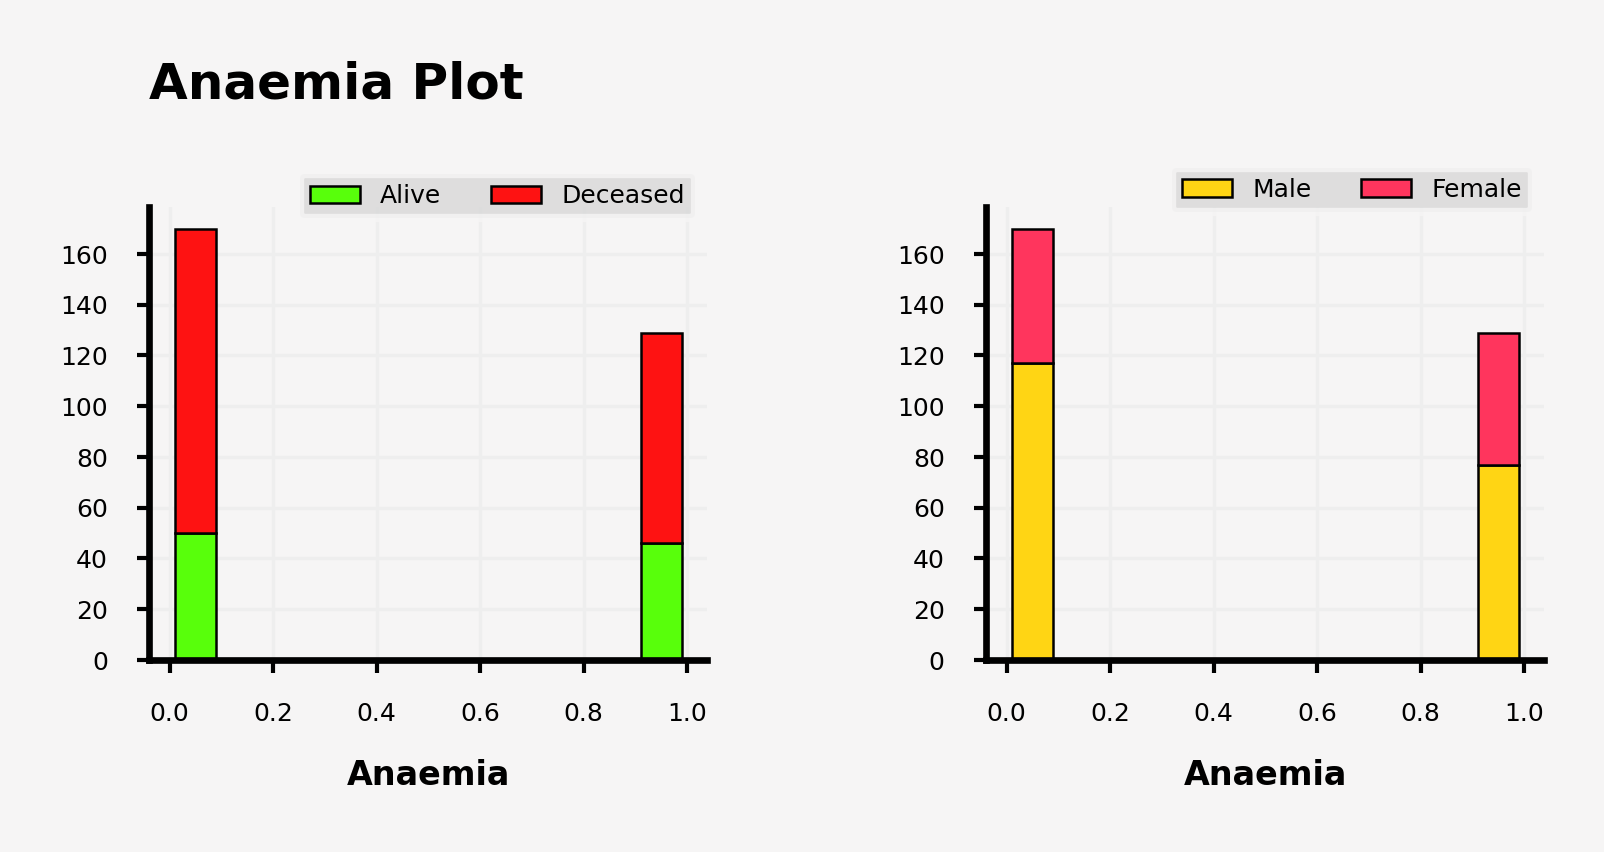

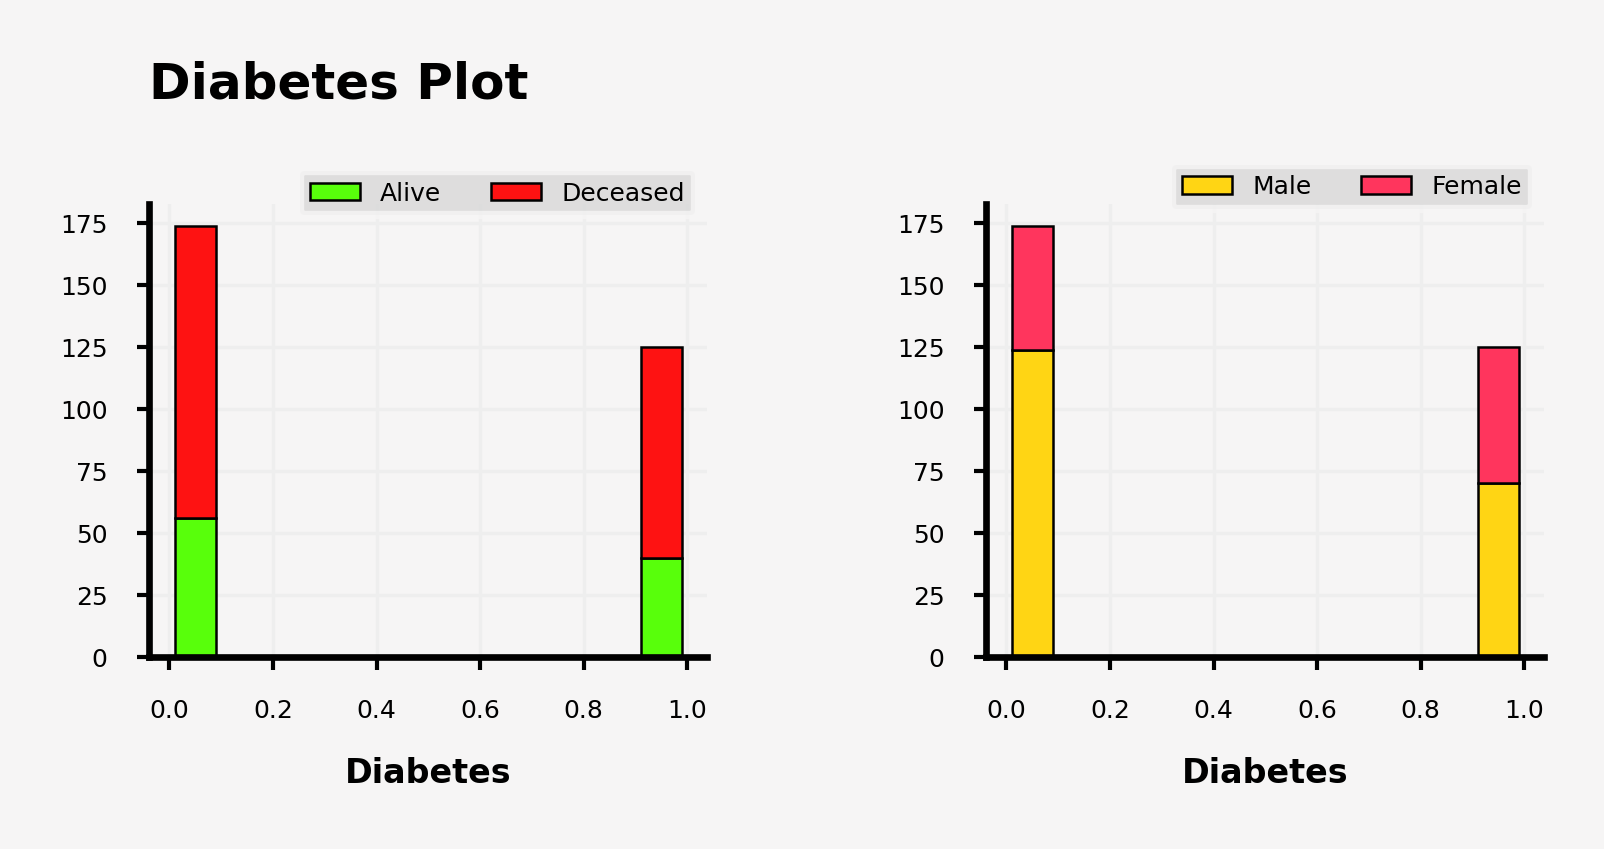

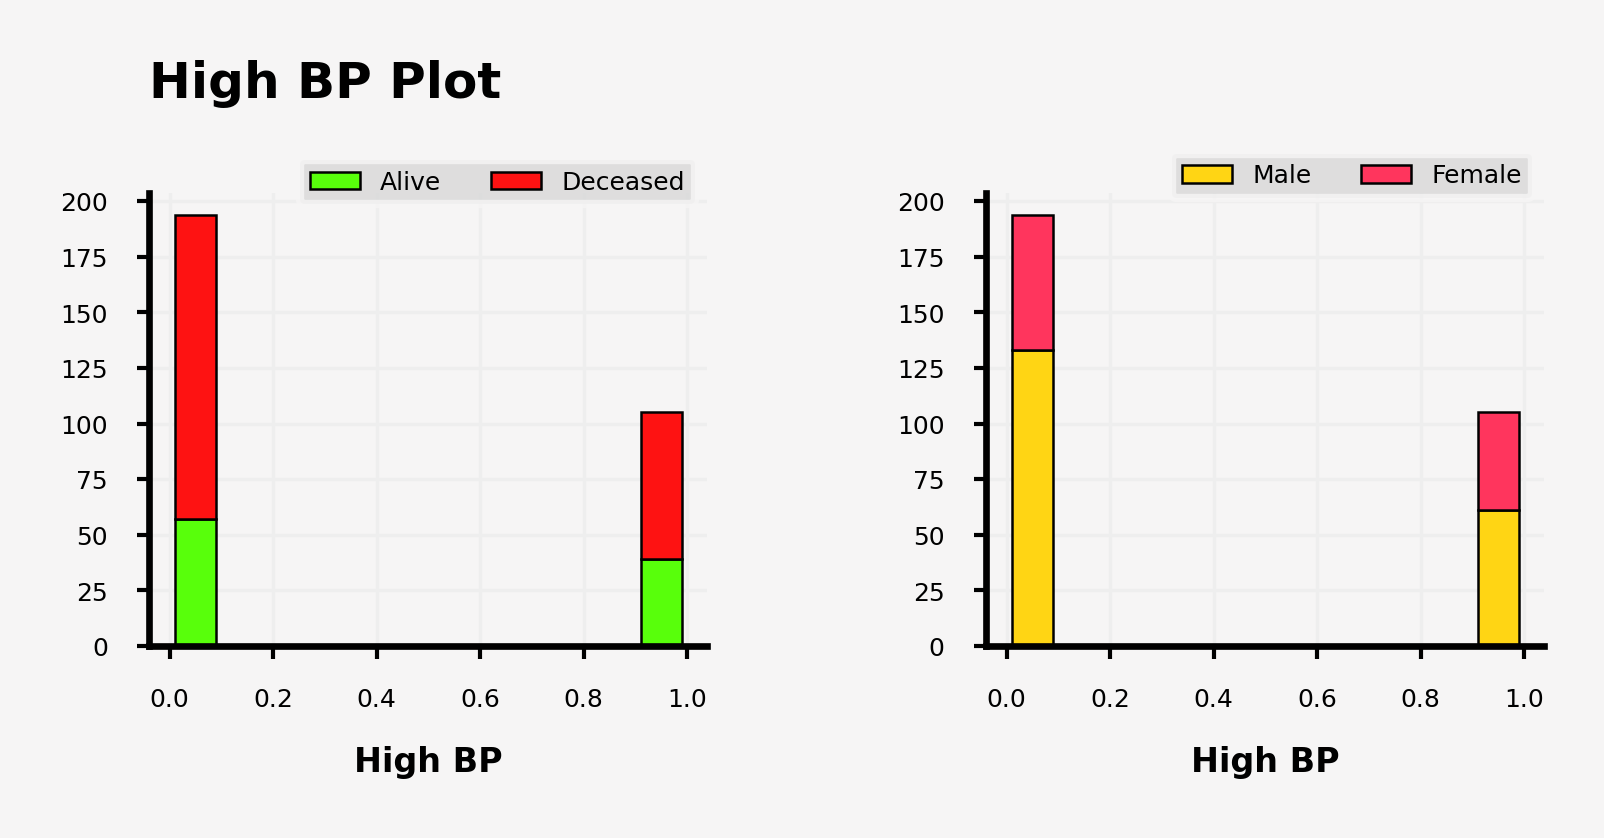

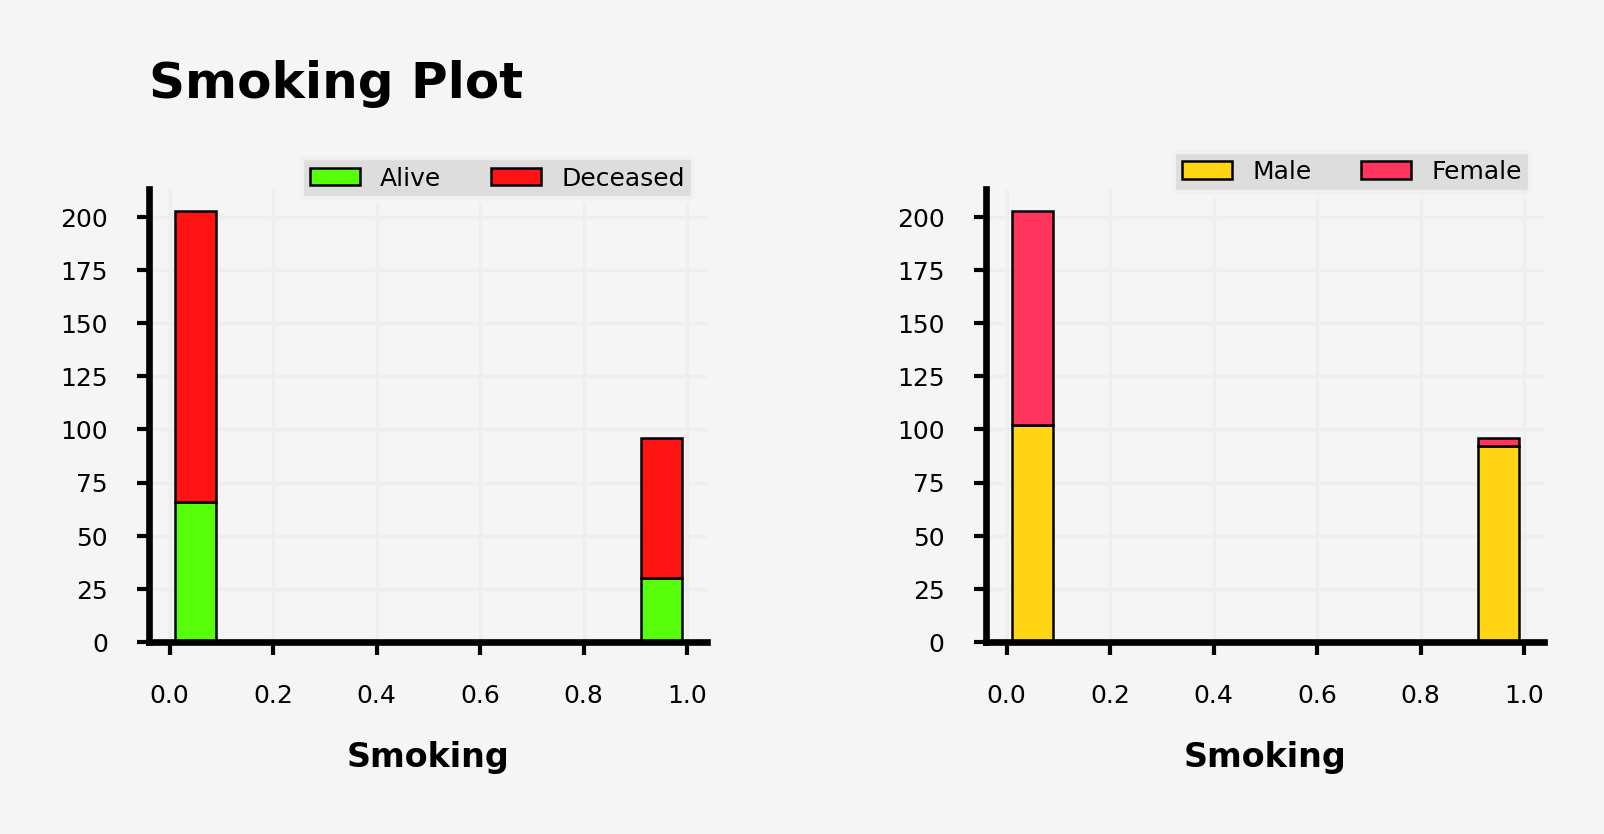

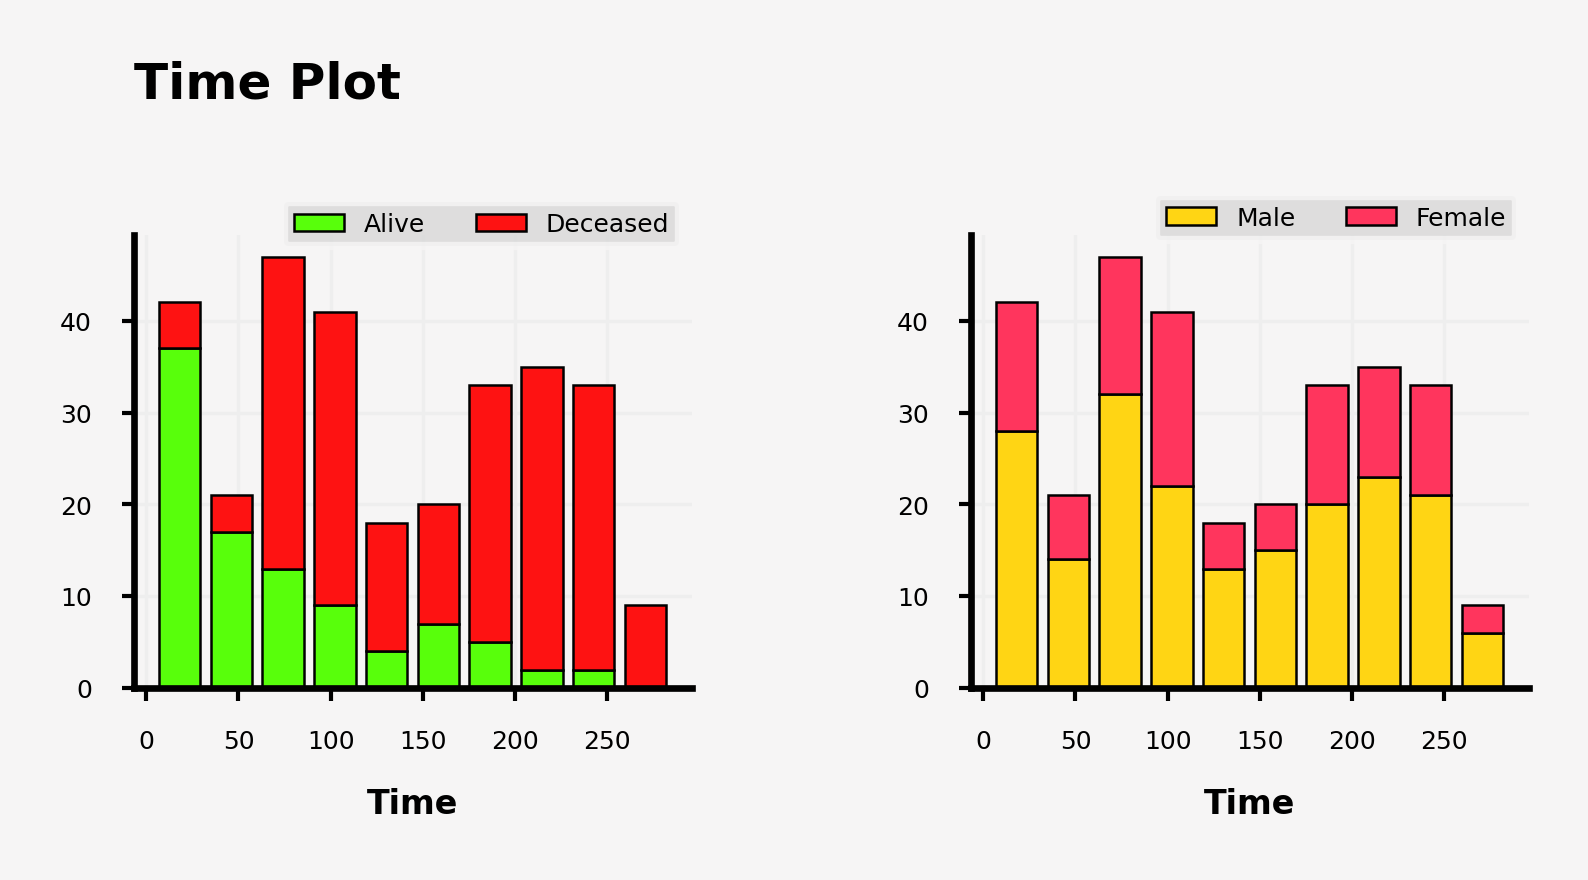

In [4]:
cat_col = ['anaemia','diabetes','high_blood_pressure','smoking','time']
cat_name = ['Anaemia','Diabetes','High BP','Smoking','Time']

for i in range(len(cat_name)):

    X = cat_col[i]
    X1 = cat_name[i]

    plt.rcParams['figure.dpi'] = 600

    fig = plt.figure(figsize=(3,1), facecolor='#f6f5f5')
    gs = fig.add_gridspec(1, 2)
    gs.update(wspace=0.5, hspace=0.5)

    background_color = "#f6f5f5"
    sns.set_palette(['#ff355d','#ffd514'])


    ax3 = fig.add_subplot(gs[0, 0])


    for s in ["right", "top"]:
        ax3.spines[s].set_visible(False)

    ax3.set_facecolor(background_color)


    ax3_sns = sns.histplot(data=heart, x=X,ax=ax3,zorder=2,kde=False,hue="DEATH_EVENT",multiple="stack", shrink=.8
                          ,linewidth=0.3,alpha=1,palette=['#FE1212','#58FF0B'])

    ax3_sns.set_xlabel(X1,fontsize=4, weight='bold')
    ax3_sns.set_ylabel('',fontsize=4, weight='bold')

    ax3_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    ax3_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)

    ax3_sns.tick_params(labelsize=3, width=0.5, length=1.5)

    ax3_sns.legend(['Alive','Deceased'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1, 1.1), loc='upper right')
    # ax3.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

    ############
    ax0 = fig.add_subplot(gs[0, 1])
    for s in ["right", "top"]:
        ax0.spines[s].set_visible(False)

    ax0.set_facecolor(background_color)


    ax0_sns = sns.histplot(data=heart, x=X,ax=ax0,zorder=2,kde=False,hue="sex",multiple="stack", shrink=.8
                          ,linewidth=0.3,alpha=1)

    ax0_sns.set_xlabel(X1,fontsize=4, weight='bold')
    ax0_sns.set_ylabel('',fontsize=4, weight='bold')

    ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


    ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)

    ax0_sns.legend(['Male','Female'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1, 1.114), loc='upper right')

    Xstart, Xend = ax0.get_xlim()
    Ystart, Yend = ax0.get_ylim()

    if i != 4:
        ax3_sns.text(Xstart, Yend+43, f'{X1} Plot', fontsize=6, weight='bold',ha='left')
    else:
        ax3_sns.text(Xstart, Yend+15, f'{X1} Plot', fontsize=6, weight='bold',ha='left')
    # ax3_sns.text(Xstart, Yend+30,f'Decrease of red blood cells or hemoglobin',fontsize=3,ha='left')

    plt.show()
    
        

# **2.1 HeatMap of the Dataset**

<a id='2.1' ></a>
* [Jump top](#0)

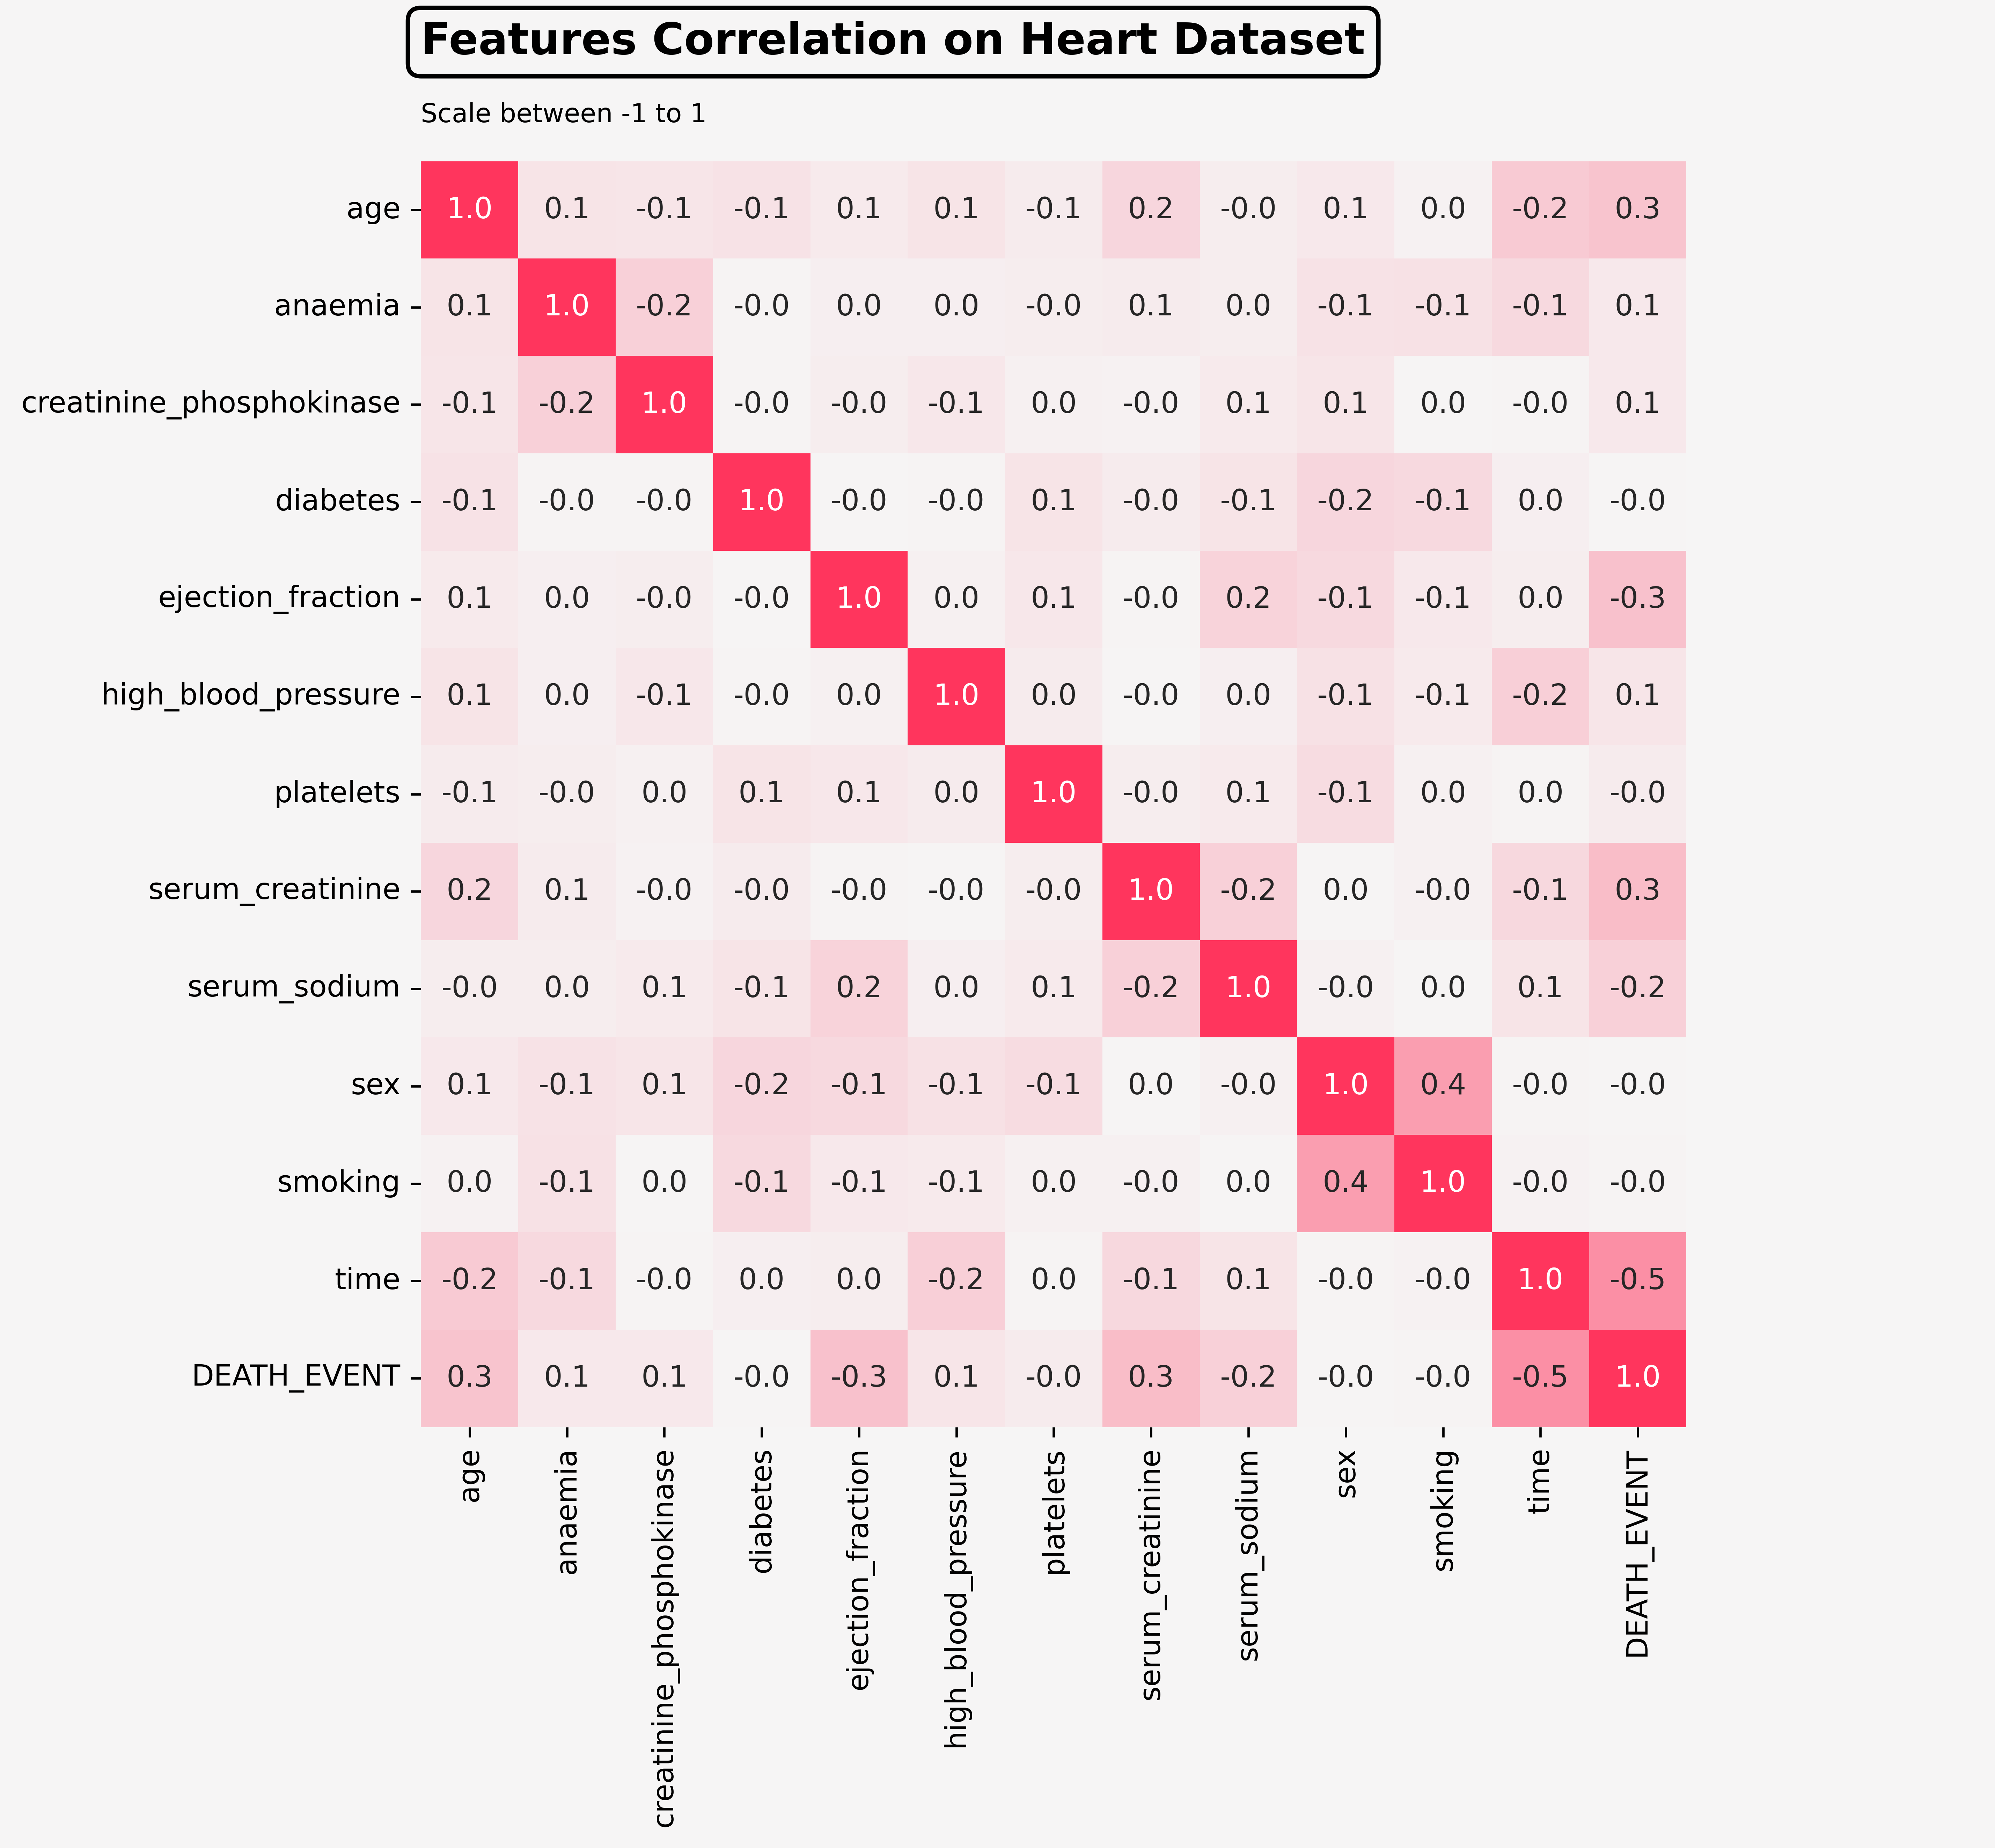

In [5]:
#heatmap of the dataset
plt.rcParams['figure.dpi'] = 600
background_color = "#f6f5f5"

fig = plt.figure(figsize=(18, 8), facecolor=background_color)
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])

colors = ["#ff355d", "#f6f5f5","#ff355d"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

ax0.set_facecolor(background_color)
ax0.text(0, -1.1, 'Features Correlation on Heart Dataset', fontsize=15, fontweight='bold',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=1.5))
ax0.text(0, -0.4, 'Scale between -1 to 1', fontsize=9, fontweight='light')

ax0_sns = sns.heatmap(heart.corr(), ax=ax0, vmin=-1, vmax=1, annot=True, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap, fmt='.1f')

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0_sns.text(Xend+2, Ystart, f'{X1} Plot', fontsize=6, weight='bold',ha='left',alpha=0)#ignore this line if you reading


plt.show()

# **3. Model Training**

<a id='3' ></a>
* [Jump top](#0)

In [6]:
!pip install pycaret

     |████████████████████████████████| 264 kB 598 kB/s 
     |████████████████████████████████| 24.2 MB 539 kB/s 
     |████████████████████████████████| 14.6 MB 22.2 MB/s 
     |████████████████████████████████| 167 kB 57.4 MB/s 
     |████████████████████████████████| 25.9 MB 52.4 MB/s 
     |████████████████████████████████| 111 kB 56.8 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 79 kB 7.0 MB/s 
     |████████████████████████████████| 1.1 MB 16.7 MB/s 
  Created wheel for alembic: filename=alembic-1.4.1-py2.py3-none-any.whl size=158172 sha256=c626b8f3aaa0954860471363ff404ce4e179c10e5aa19a089067de8829ecbbfe
  Stored in directory: /root/.cache/pip/wheels/be/5d/0a/9e13f53f4f5dfb67cd8d245bb7cdffe12f135846f491a283e3
  Created wheel for databricks-cli: filename=databricks_cli-0.15.0-py3-none-any.whl size=105260 sha256=b46c76d2a7da7c7e48026b9b0eb1751079c5565337a59cf2878564d3c5f55d75
  Stored in directory: /root/.cache/pip/wheels/e7

**3.1 Pycaret Model Comparision**

<a id='3.1' ></a>
* [Jump top](#0)

In [7]:
from pycaret.classification import *
env = setup(silent=True,data=heart,target='DEATH_EVENT',session_id=69,normalize=True,use_gpu=True,fix_imbalance=True)

,Description,Value
0,session_id,69
1,Target,DEATH_EVENT
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(299, 13)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
models = compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8521,0.9088,0.7667,0.7875,0.7748,0.6647,0.6669,0.6620
catboost,CatBoost Classifier,0.8426,0.8996,0.7524,0.7750,0.7600,0.6431,0.6467,1.7340
gbc,Gradient Boosting Classifier,0.8090,0.8808,0.7071,0.7083,0.7050,0.5640,0.5666,0.1240
lightgbm,Light Gradient Boosting Machine,0.8088,0.8858,0.6762,0.7424,0.6987,0.5595,0.5685,0.8240
ada,Ada Boost Classifier,0.8043,0.8602,0.7095,0.7077,0.7042,0.5584,0.5627,0.1220
xgboost,Extreme Gradient Boosting,0.7993,0.8690,0.6762,0.7219,0.6929,0.5439,0.5489,0.2970
et,Extra Trees Classifier,0.7900,0.8617,0.6238,0.7192,0.6625,0.5121,0.5189,1.0830
ridge,Ridge Classifier,0.7660,0.0000,0.7714,0.6205,0.6829,0.5022,0.5141,0.1840
lda,Linear Discriminant Analysis,0.7660,0.8510,0.7714,0.6205,0.6829,0.5022,0.5141,0.0210
lr,Logistic Regression,0.7657,0.8542,0.7548,0.6256,0.6820,0.5004,0.5068,0.6600


**3.2 Optuna LGBM Hyperparameter tuning**

<a id='3.2' ></a>
* [Jump top](#0)

In [9]:
y = heart.DEATH_EVENT
X = heart.drop('DEATH_EVENT',axis=1,inplace=False)

sm = SMOTE(random_state=42) #balancing target count
X, y = sm.fit_resample(X, y)

In [10]:
def fit_lgb(trial, x_train, y_train, x_test, y_test):
    params = {
        'reg_alpha' : trial.suggest_loguniform('reg_alpha' , 0.47 , 0.5),
        'reg_lambda' : trial.suggest_loguniform('reg_lambda' , 0.32 , 0.33),
        'num_leaves' : trial.suggest_int('num_leaves' , 50 , 70),
        'learning_rate' : trial.suggest_uniform('learning_rate' ,0.02 , 0.04),
        'max_depth' : trial.suggest_int('max_depth', 30 , 40),
        'n_estimators' : trial.suggest_int('n_estimators', 100 , 6100),
        'min_child_weight' : trial.suggest_loguniform('min_child_weight', 0.015 , 0.02),
        'subsample' : trial.suggest_uniform('subsample' , 0.9 , 1.0), 
        'colsample_bytree' : trial.suggest_loguniform('colsample_bytree', 0.52 , 1),
        'min_child_samples' : trial.suggest_int('min_child_samples', 76, 80),
        'metric' : 'auc',
        'device_type' : 'gpu',
    }
    
    
    model = LGBMClassifier(**params, random_state=69)
    model.fit(x_train, y_train,eval_set=[(x_test,y_test)], early_stopping_rounds=150, verbose=False)
    
    y_train_pred = model.predict(x_train)
    
    y_test_pred = model.predict(x_test)
    y_train_pred = y_train_pred
    y_test_pred = y_test_pred
    
    log = {
        "train ACCURACY": accuracy_score(y_train, y_train_pred),
        "valid ACCURACY": accuracy_score(y_test, y_test_pred)
    }
    
    return model, log

In [11]:
def objective(trial):
    au = 0
    sk = KFold(n_splits=5,random_state=69,shuffle=True)
    for fold,(train_indx,test_indx) in enumerate(sk.split(X)):
        x_train = X.values[train_indx]
        y_train = y.values[train_indx]
        x_test = X.values[test_indx]
        y_test = y.values[test_indx]
        
        stand = StandardScaler()
        x_train = stand.fit_transform(x_train)
        x_test = stand.transform(x_test)
        
        model, log = fit_lgb(trial, x_train, y_train, x_test, y_test)
    au += log['valid ACCURACY']
        
    return au

In [12]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)
lgbm_para = study.best_params
print(lgbm_para)

[I 2021-09-14 17:39:40,897] A new study created in memory with name: no-name-68e3087d-231f-4ab9-8a6c-812ab6434130
[I 2021-09-14 17:39:42,462] Trial 0 finished with value: 0.9259259259259259 and parameters: {'reg_alpha': 0.48922273183341525, 'reg_lambda': 0.32579776944963723, 'num_leaves': 59, 'learning_rate': 0.027472185963654777, 'max_depth': 35, 'n_estimators': 931, 'min_child_weight': 0.017663608270173752, 'subsample': 0.9700131107083036, 'colsample_bytree': 0.6994467220714384, 'min_child_samples': 76}. Best is trial 0 with value: 0.9259259259259259.
[I 2021-09-14 17:39:44,859] Trial 1 finished with value: 0.9135802469135802 and parameters: {'reg_alpha': 0.4702679633608534, 'reg_lambda': 0.3289916656454233, 'num_leaves': 55, 'learning_rate': 0.03576694294576466, 'max_depth': 37, 'n_estimators': 2873, 'min_child_weight': 0.018698184685201947, 'subsample': 0.9809960136262403, 'colsample_bytree': 0.9709296149624628, 'min_child_samples': 78}. Best is trial 0 with value: 0.92592592592592

{'reg_alpha': 0.48922273183341525, 'reg_lambda': 0.32579776944963723, 'num_leaves': 59, 'learning_rate': 0.027472185963654777, 'max_depth': 35, 'n_estimators': 931, 'min_child_weight': 0.017663608270173752, 'subsample': 0.9700131107083036, 'colsample_bytree': 0.6994467220714384, 'min_child_samples': 76}


**3.3 Optuna CATBOOST Hyperparameter tuning**

<a id='3.3' ></a>
* [Jump top](#0)

In [13]:
def fit_cat(trial, x_train, y_train, x_test, y_test):
    params = {
        'iterations':trial.suggest_int("iterations", 1000, 20000),
        'objective': trial.suggest_categorical('objective', ['Logloss', 'CrossEntropy']),
        'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bayesian', 'Bernoulli', 'MVS']),
        'od_wait':trial.suggest_int('od_wait', 500, 2000),
        'learning_rate' : trial.suggest_uniform('learning_rate',0.02,1),
        'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
        'random_strength': trial.suggest_uniform('random_strength',10,50),
        'depth': trial.suggest_int('depth',1,15),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1,30),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,15),
        'verbose': False,
        'task_type' : 'CPU',
        'devices' : '0'
    }
    
    if params['bootstrap_type'] == 'Bayesian':
        params['bagging_temperature'] = trial.suggest_float('bagging_temperature', 0, 10)
    elif params['bootstrap_type'] == 'Bernoulli':
        params['subsample'] = trial.suggest_float('subsample', 0.1, 1)
    
    
    model = CatBoostClassifier(**params)
    model.fit(
        x_train, y_train,
        eval_set=[(x_test,y_test)],
        early_stopping_rounds=100,
        use_best_model=True
    )
    
    y_train_pred = model.predict(x_train)
    
    y_test_pred = model.predict(x_test)
    y_train_pred = y_train_pred
    y_test_pred = y_test_pred
    
    log = {
        "train ACCURACY": accuracy_score(y_train, y_train_pred),
        "valid ACCURACY": accuracy_score(y_test, y_test_pred)
    }
    
    return model, log

In [14]:
def objective2(trial):
    au = 0
    sk = KFold(n_splits=5,random_state=69,shuffle=True)
    for fold,(train_indx,test_indx) in enumerate(sk.split(X)):
        x_train = X.values[train_indx]
        y_train = y.values[train_indx]
        x_test = X.values[test_indx]
        y_test = y.values[test_indx]
        
        stand = StandardScaler()
        x_train = stand.fit_transform(x_train)
        x_test = stand.transform(x_test)
        
        model, log = fit_cat(trial, x_train, y_train, x_test, y_test)
    au += log['valid ACCURACY']
        
    return au

In [15]:
study2 = optuna.create_study(direction='maximize')
study2.optimize(objective2, n_trials=5,timeout=600)

[I 2021-09-14 17:39:59,472] A new study created in memory with name: no-name-3ec5f97e-b3f6-480d-9ffc-249ac219df66
[I 2021-09-14 17:51:30,261] Trial 0 finished with value: 0.9506172839506173 and parameters: {'iterations': 19535, 'objective': 'CrossEntropy', 'bootstrap_type': 'Bayesian', 'od_wait': 1361, 'learning_rate': 0.20914445442159638, 'reg_lambda': 71.62825624866332, 'random_strength': 45.55155746095214, 'depth': 12, 'min_data_in_leaf': 26, 'leaf_estimation_iterations': 8, 'bagging_temperature': 1.5846143025687243}. Best is trial 0 with value: 0.9506172839506173.


In [16]:
cat_para = study2.best_params
print(cat_para)

{'iterations': 19535, 'objective': 'CrossEntropy', 'bootstrap_type': 'Bayesian', 'od_wait': 1361, 'learning_rate': 0.20914445442159638, 'reg_lambda': 71.62825624866332, 'random_strength': 45.55155746095214, 'depth': 12, 'min_data_in_leaf': 26, 'leaf_estimation_iterations': 8, 'bagging_temperature': 1.5846143025687243}


**3.4 Optuna XGBOOST Hyperparameter tuning**

<a id='3.4' ></a>
* [Jump top](#0)

In [17]:
def fit_xgb(trial, x_train, y_train, x_test, y_test):

    params = {
        'tweedie_variance_power': trial.suggest_discrete_uniform('tweedie_variance_power', 1.0, 2.0, 0.1),
        'max_depth': trial.suggest_int('max_depth', 6, 10), # Extremely prone to overfitting!
        'n_estimators': trial.suggest_int('n_estimators', 400, 4000, 400), # Extremely prone to overfitting!
        'eta': trial.suggest_float('eta', 0.007, 0.013), # Most important parameter.
        'subsample': trial.suggest_discrete_uniform('subsample', 0.2, 0.9, 0.1),
        'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.2, 0.9, 0.1),
        'colsample_bylevel': trial.suggest_discrete_uniform('colsample_bylevel', 0.2, 0.9, 0.1),
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-4, 1e4), # I've had trouble with LB score until tuning this.
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1e4), # L2 regularization
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1e4), # L1 regularization
        'gamma': trial.suggest_loguniform('gamma', 1e-4, 1e4)
    } 
    
    model = XGBClassifier(**params,tree_method='gpu_hist', random_state=69,verbose_eval=False)
    model.fit(
        x_train, y_train,
        eval_set=[(x_test,y_test)],verbose=False,
        early_stopping_rounds=100
    )
    
    y_train_pred = model.predict(x_train)
    
    y_test_pred = model.predict(x_test)
    y_train_pred = y_train_pred
    y_test_pred = y_test_pred
    
    log = {
        "train ACCURACY": accuracy_score(y_train, y_train_pred),
        "valid ACCURACY": accuracy_score(y_test, y_test_pred)
    }
    
    return model, log

In [18]:
def objective3(trial):
    au = 0
    sk = KFold(n_splits=5,random_state=69,shuffle=True)
    for fold,(train_indx,test_indx) in enumerate(sk.split(X)):
        x_train = X.values[train_indx]
        y_train = y.values[train_indx]
        x_test = X.values[test_indx]
        y_test = y.values[test_indx]
        
        stand = StandardScaler()
        x_train = stand.fit_transform(x_train)
        x_test = stand.transform(x_test)
        
        model, log = fit_xgb(trial, x_train, y_train, x_test, y_test)
    au += log['valid ACCURACY']
        
    return au

In [19]:
study3 = optuna.create_study(direction='maximize')
study3.optimize(objective3, n_trials=5,timeout=10)

[I 2021-09-14 17:51:31,859] A new study created in memory with name: no-name-7af47b24-bbdd-4f48-8086-55b566889610
[I 2021-09-14 17:51:32,388] Trial 0 finished with value: 0.5061728395061729 and parameters: {'tweedie_variance_power': 1.8, 'max_depth': 6, 'n_estimators': 1200, 'eta': 0.007041767710263351, 'subsample': 0.2, 'colsample_bytree': 0.6000000000000001, 'colsample_bylevel': 0.30000000000000004, 'min_child_weight': 0.0011590802741197573, 'reg_lambda': 5532.526186821407, 'reg_alpha': 0.00019226893126448095, 'gamma': 21.531348402488785}. Best is trial 0 with value: 0.5061728395061729.
[I 2021-09-14 17:51:42,379] Trial 1 finished with value: 0.9382716049382716 and parameters: {'tweedie_variance_power': 1.7000000000000002, 'max_depth': 8, 'n_estimators': 800, 'eta': 0.009406392241600944, 'subsample': 0.6000000000000001, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.30000000000000004, 'min_child_weight': 0.0007476257125543712, 'reg_lambda': 0.0490103503221729, 'reg_alpha': 0.0005932

In [20]:
xgb_para = study3.best_params
print(xgb_para)

{'tweedie_variance_power': 1.7000000000000002, 'max_depth': 8, 'n_estimators': 800, 'eta': 0.009406392241600944, 'subsample': 0.6000000000000001, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.30000000000000004, 'min_child_weight': 0.0007476257125543712, 'reg_lambda': 0.0490103503221729, 'reg_alpha': 0.000593218798364811, 'gamma': 0.09179488307343461}


# **4. Model Best Score**

<a id='4'></a>
* [Jump top](#0)

In [21]:
print(f'LGBM Best Validation Accuracy score: {round(100*study.best_value,2)}%')

print(f'CATBOOST Best Validation Accuracy score: {round(100*study2.best_value,2)}%')

print(f'XGBOOST Best Validation Accuracy score: {round(100*study3.best_value,2)}%')

LGBM Best Validation Accuracy score: 92.59%
CATBOOST Best Validation Accuracy score: 95.06%
XGBOOST Best Validation Accuracy score: 93.83%


# **5. Work in progress**

<a id='5'></a>
* [Jump top](#0)

<div style="color:black; display:fill; border-radius:5px;background-color:#ffd514;font-size:160%;font-family:sans-serif;letter-spacing:0.5px">If you like the work please upvote (ᕗ ͡👁 ͜ʖ ͡👁)ᕗ</div>